In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy
import csv
from scipy.stats import norm
import matplotlib.mlab as mlab
import scipy.stats as stats
import numpy as np

In [2]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

In [3]:
sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

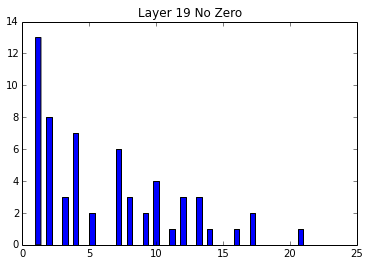

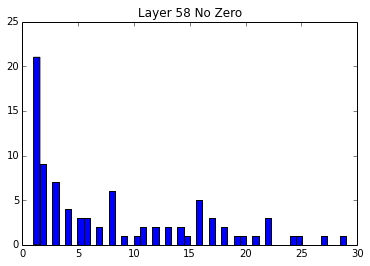

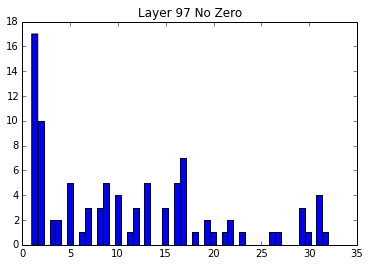

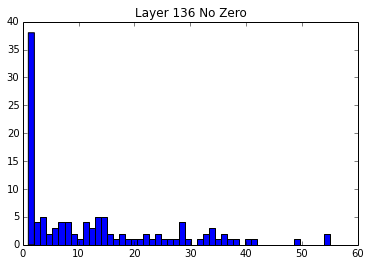

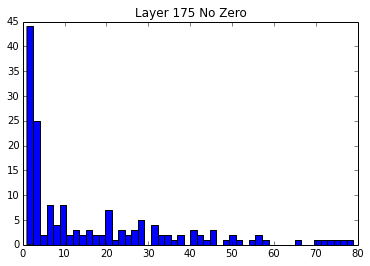

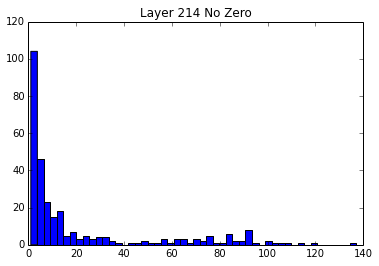

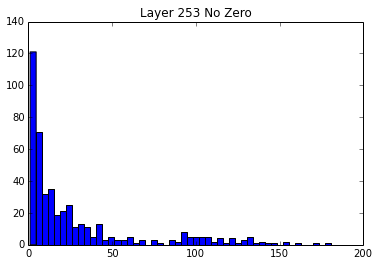

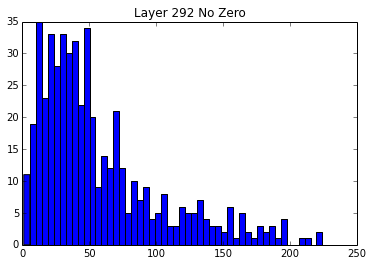

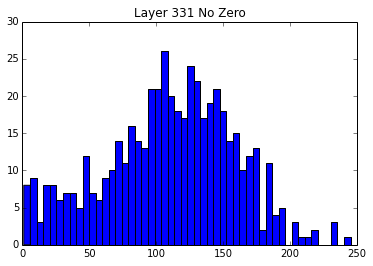

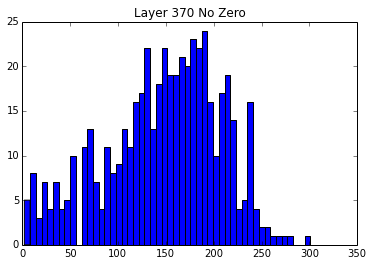

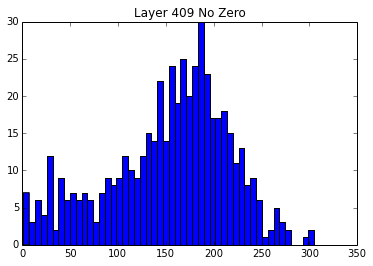

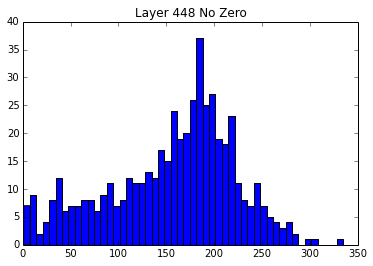

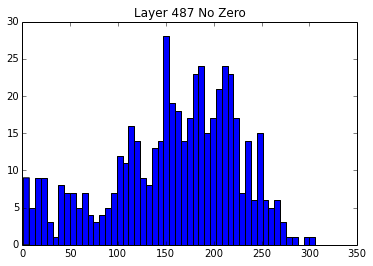

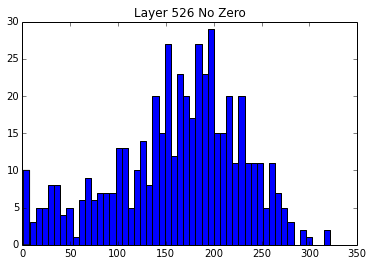

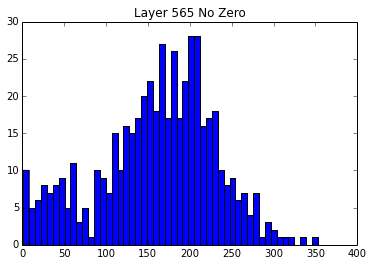

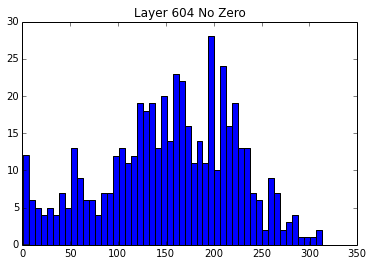

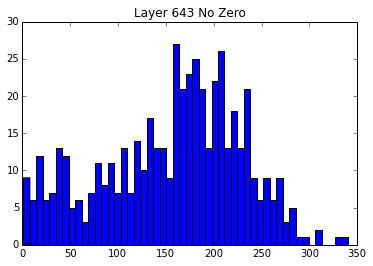

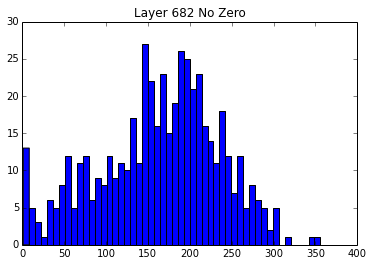

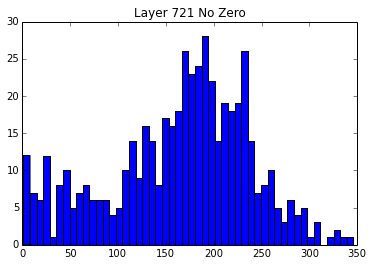

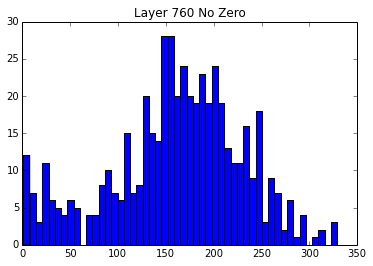

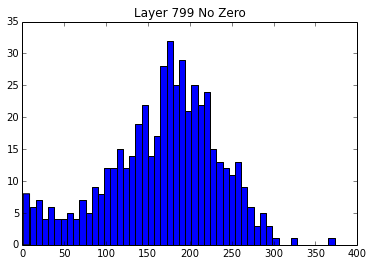

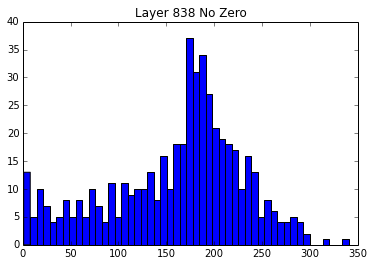

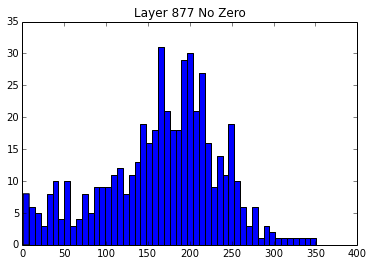

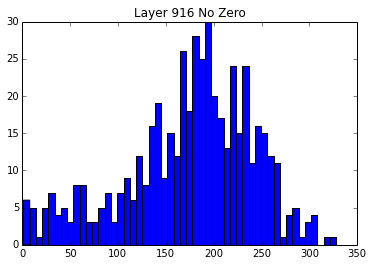

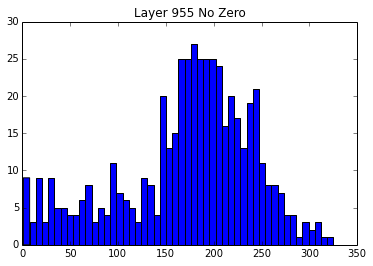

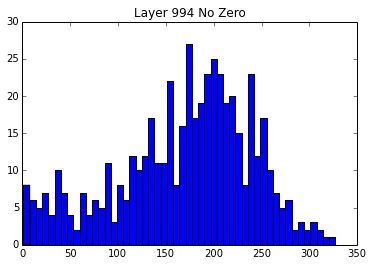

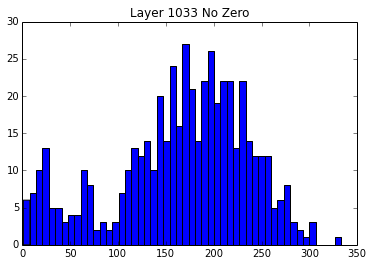

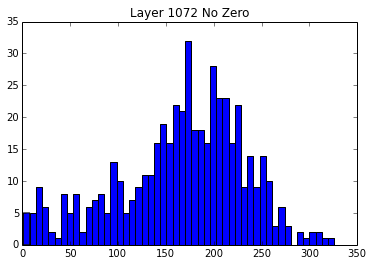

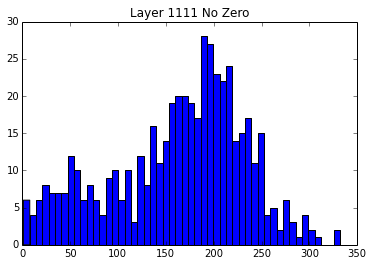

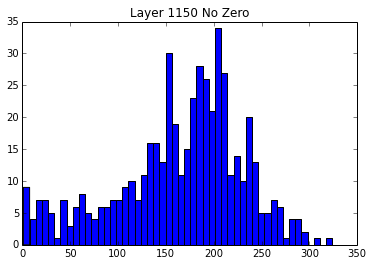

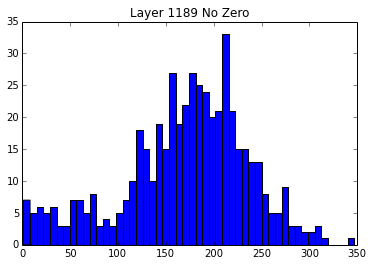

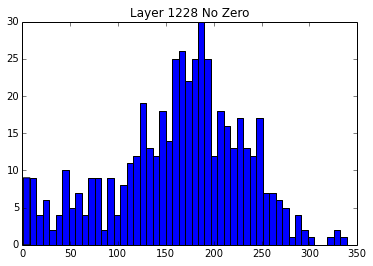

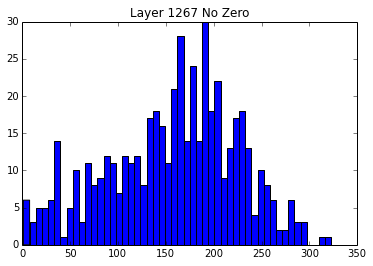

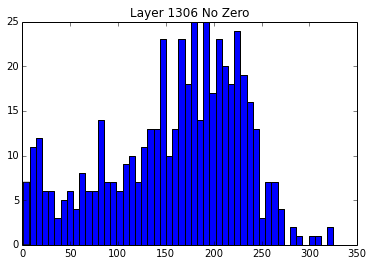

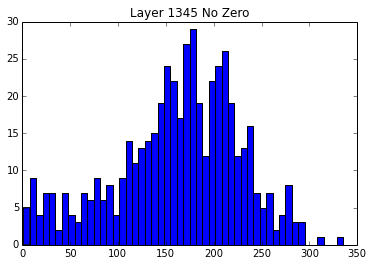

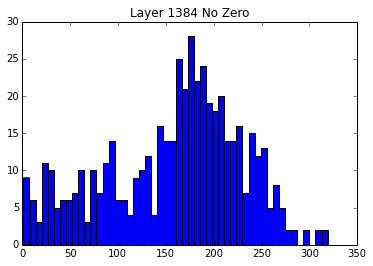

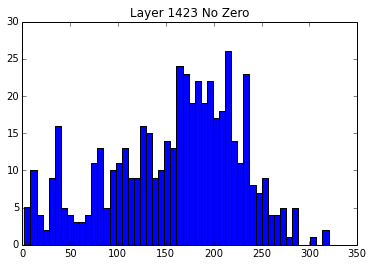

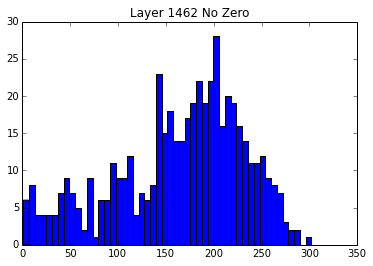

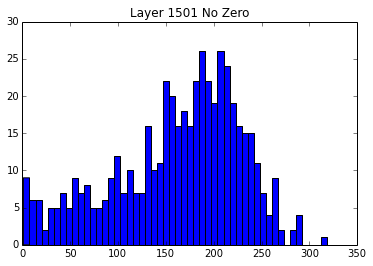

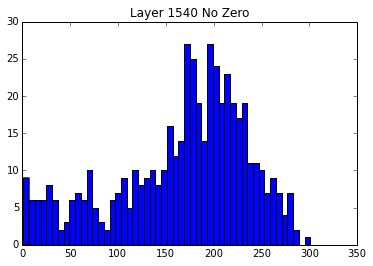

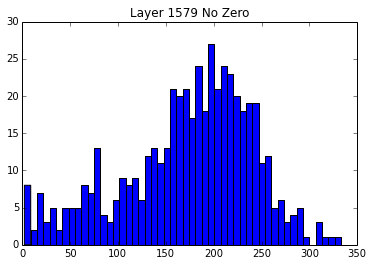

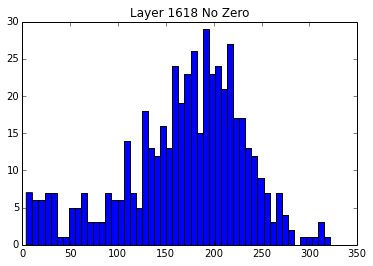

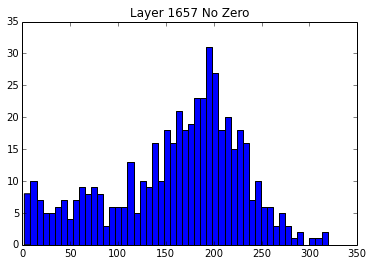

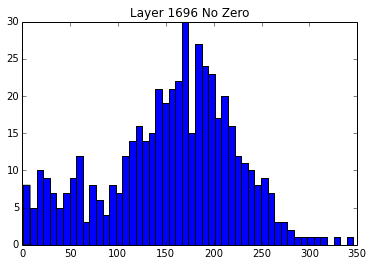

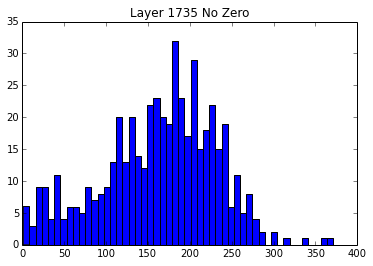

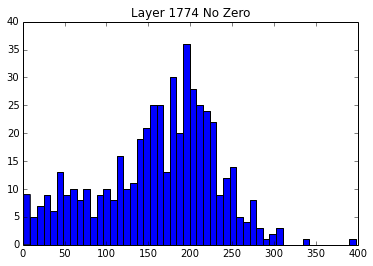

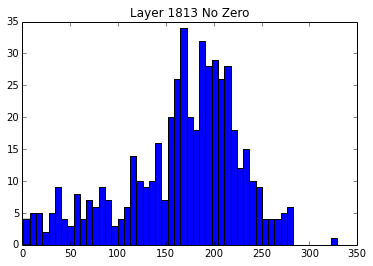

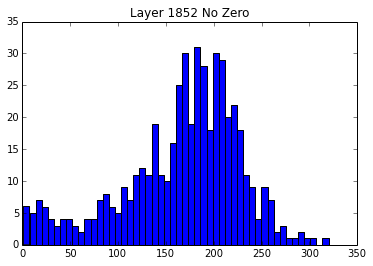

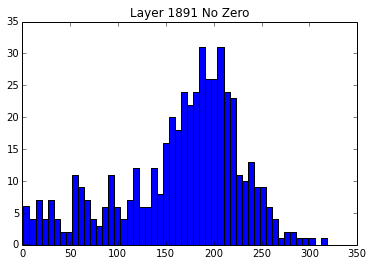

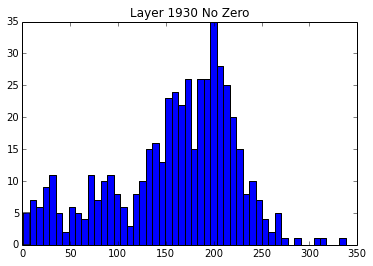

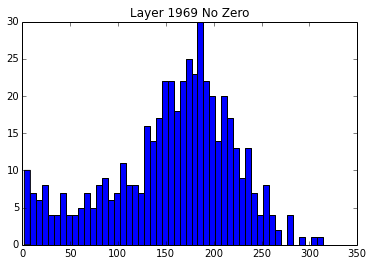

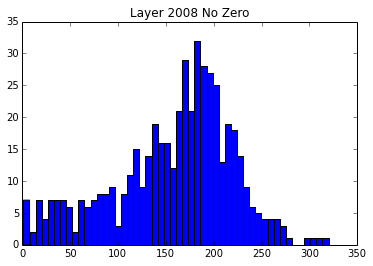

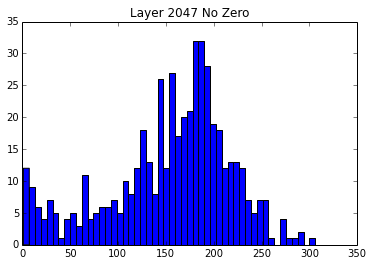

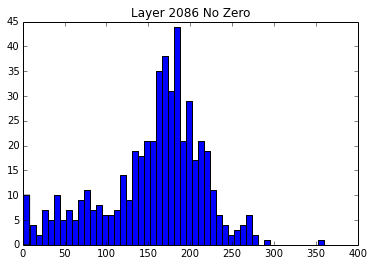

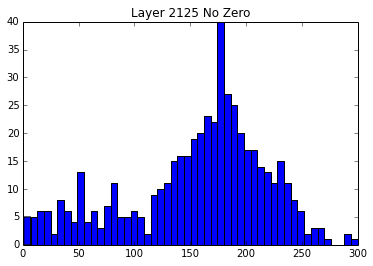

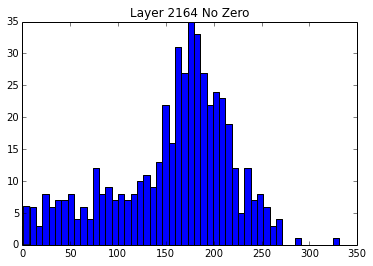

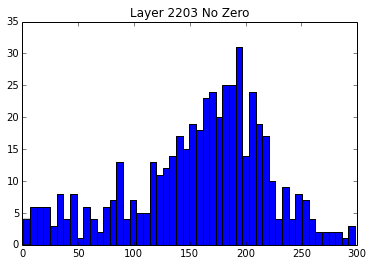

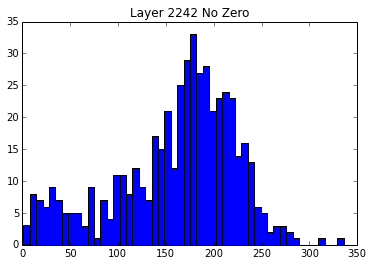

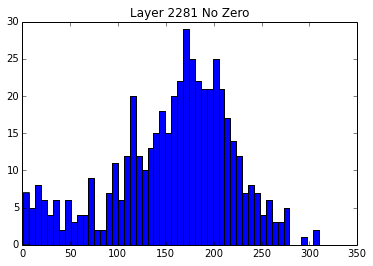

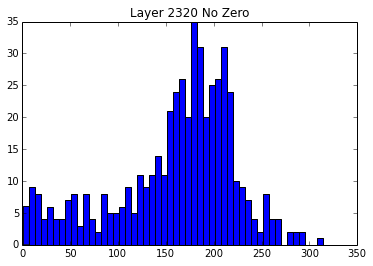

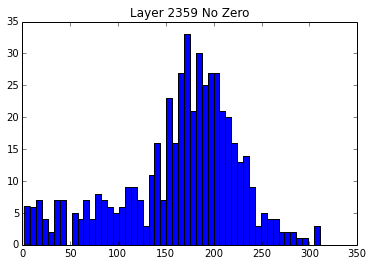

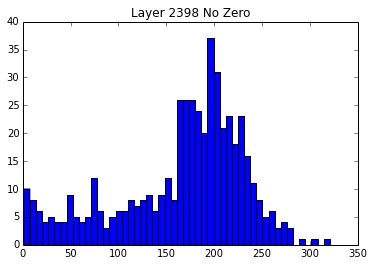

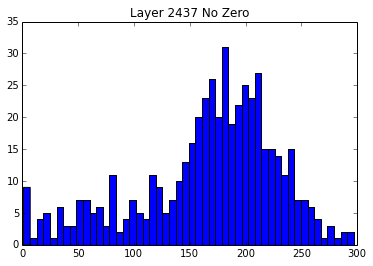

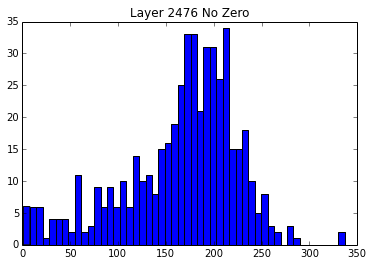

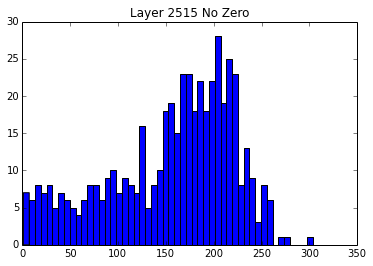

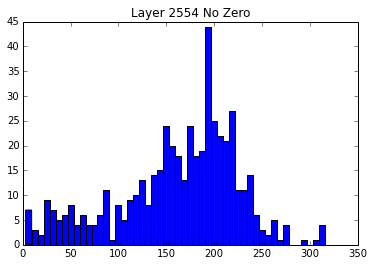

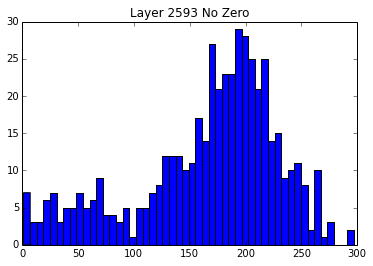

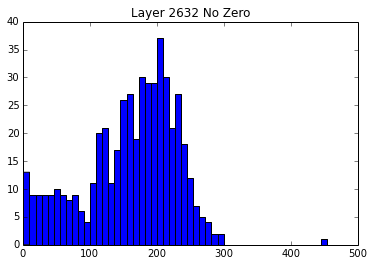

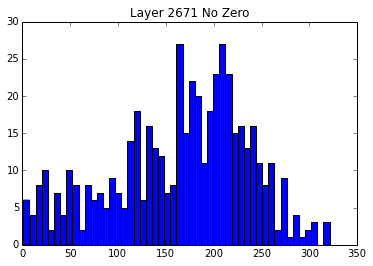

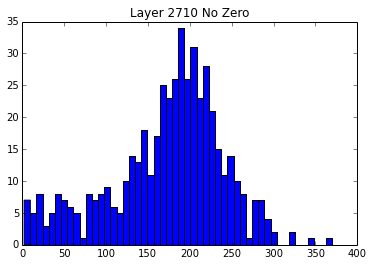

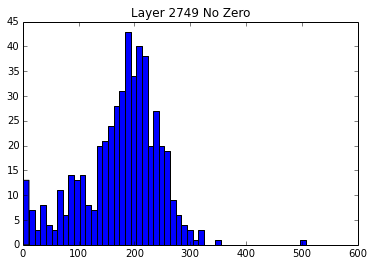

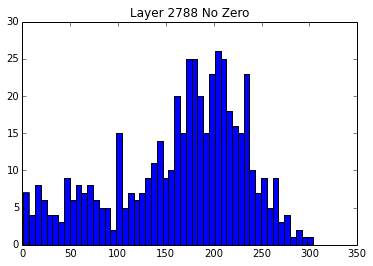

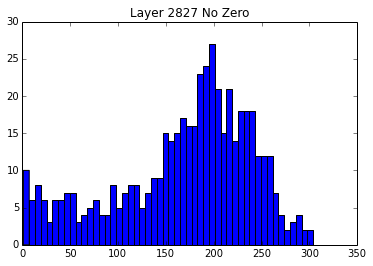

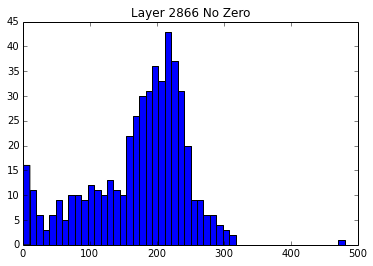

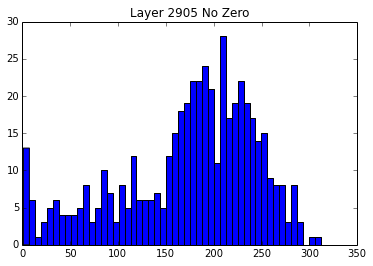

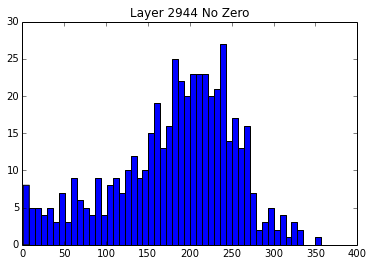

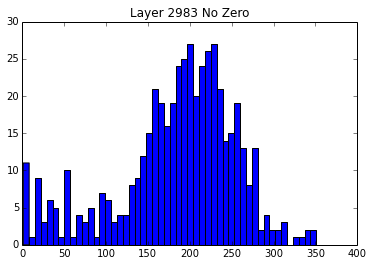

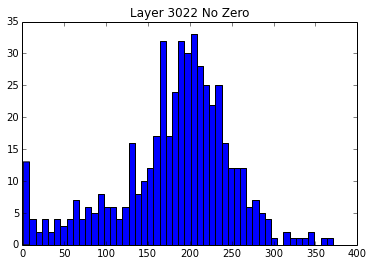

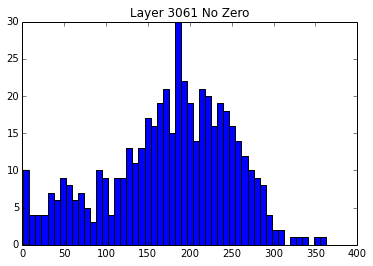

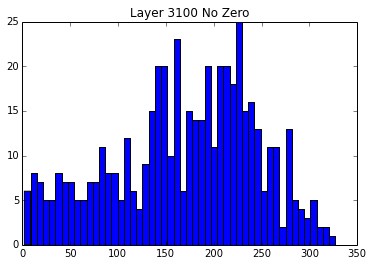

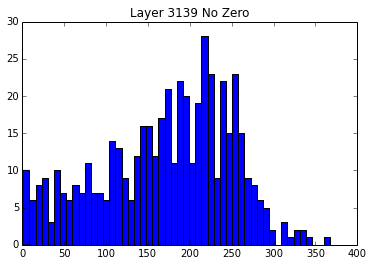

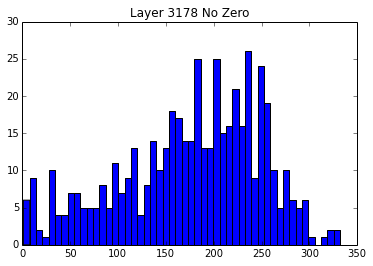

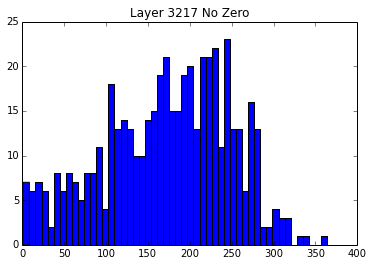

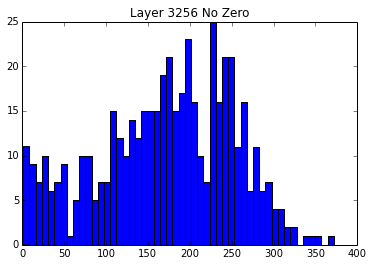

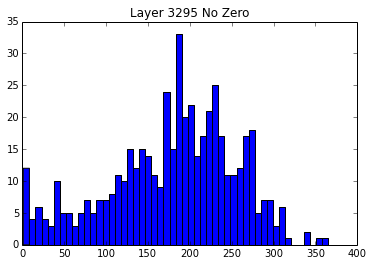

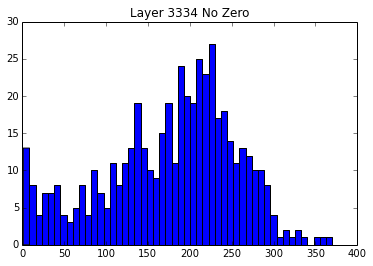

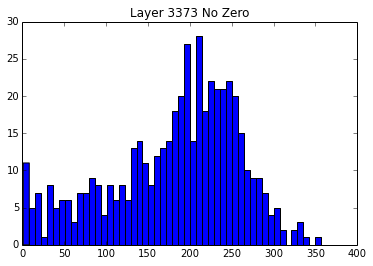

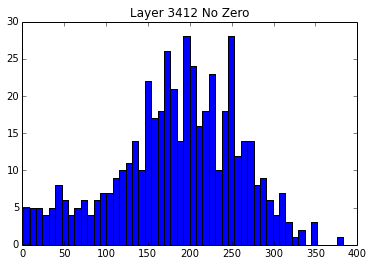

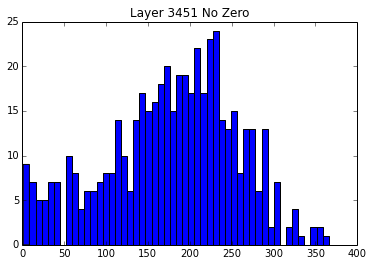

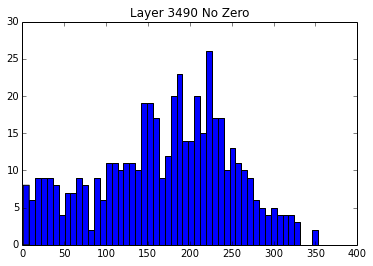

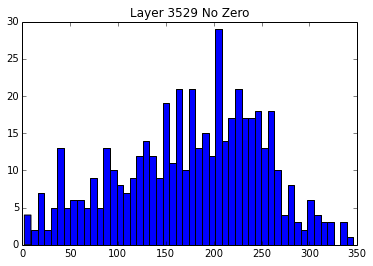

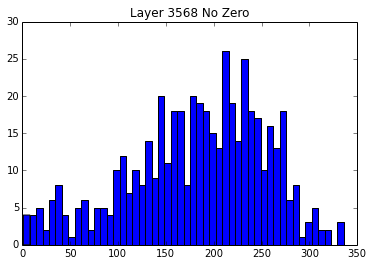

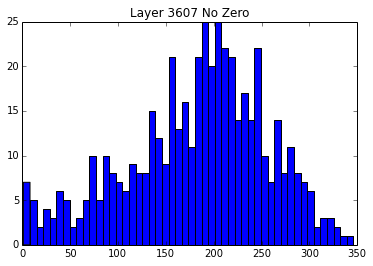

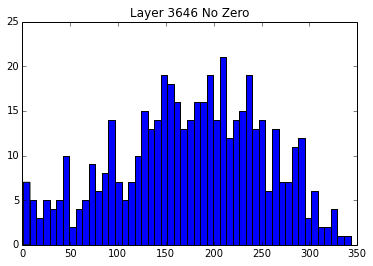

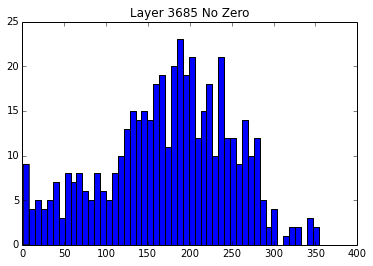

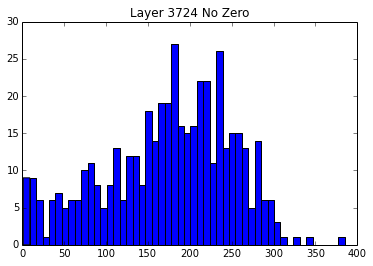

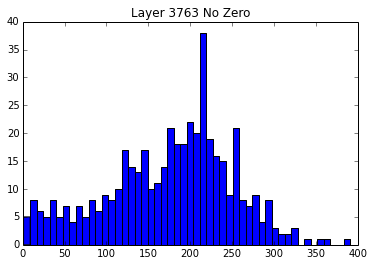

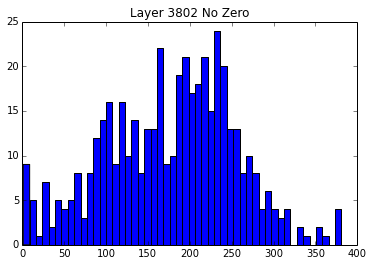

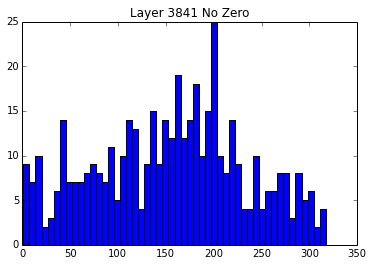

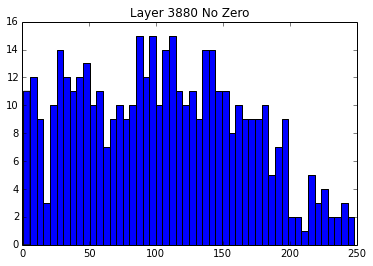

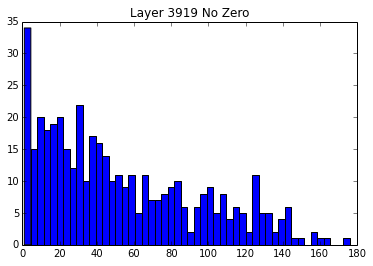

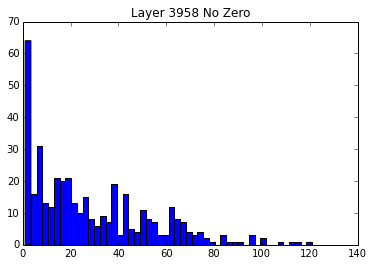

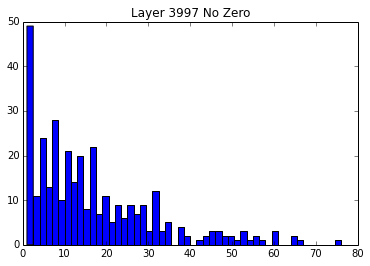

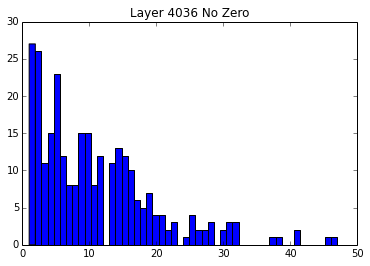

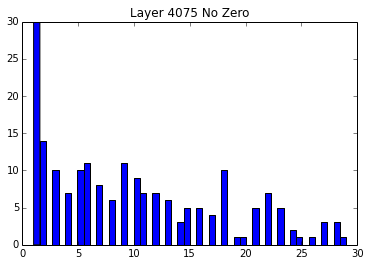

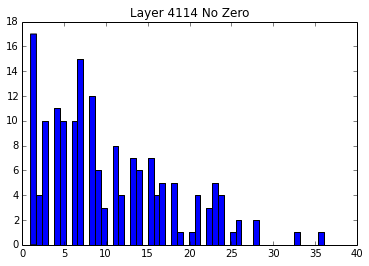

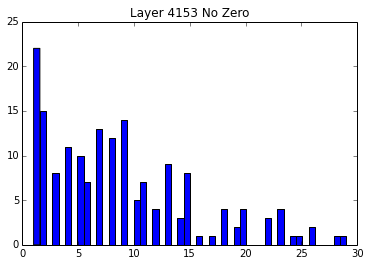

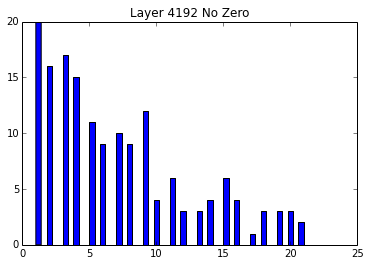

In [7]:
for i in sorted_x:
    unmaskedSynapsesNoZero = ([r[-1] for r in rows if r[-2] != 0 if r[-1] !=0 if r[0] == i])
    plt.hist(unmaskedSynapsesNoZero, bins=50)
    plt.title("Layer " + str(i) + " No Zero")
    plt.show()

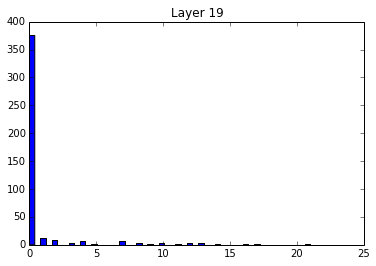

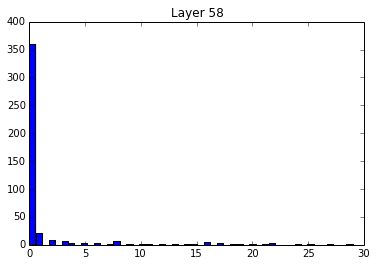

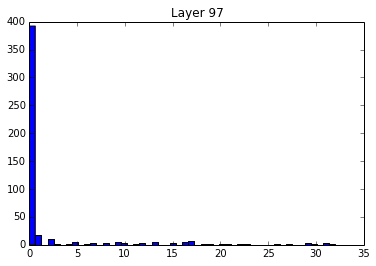

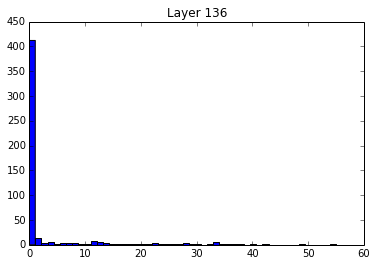

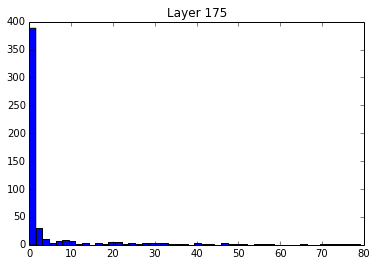

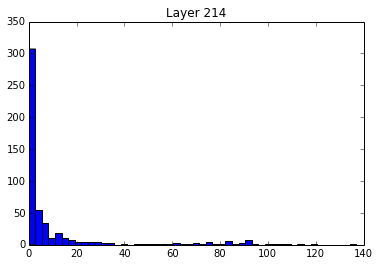

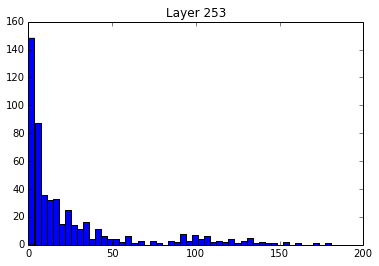

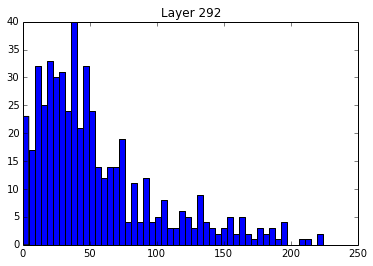

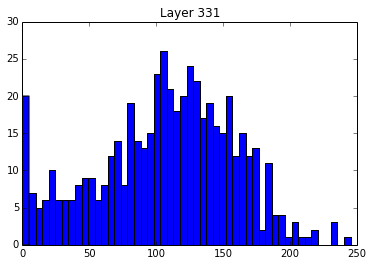

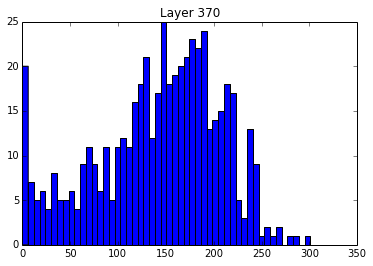

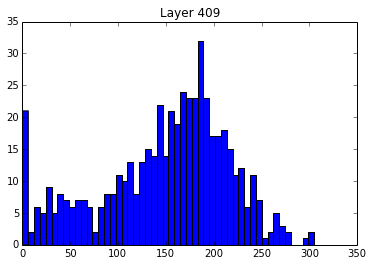

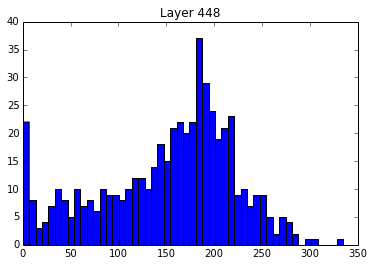

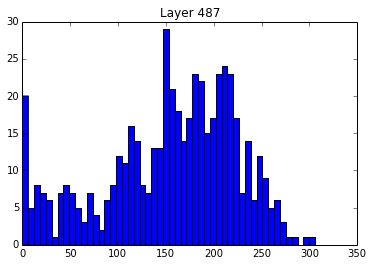

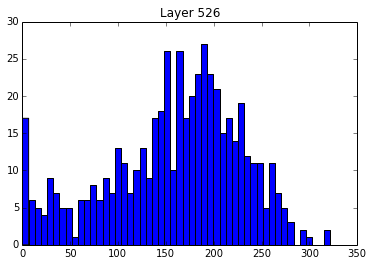

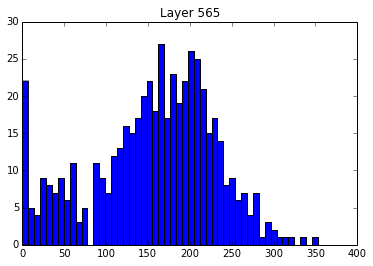

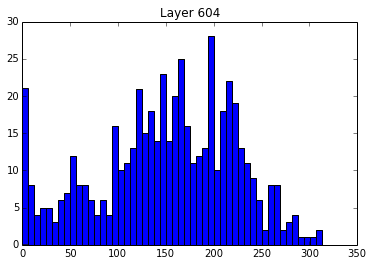

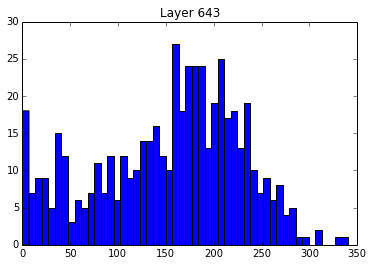

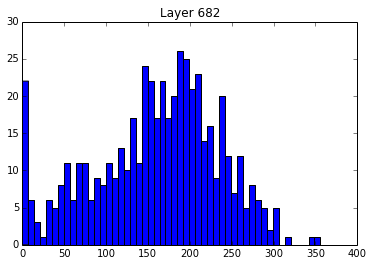

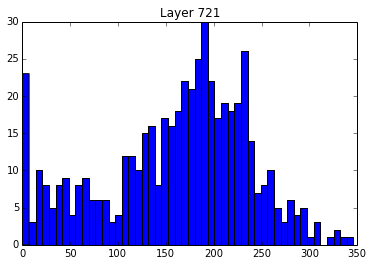

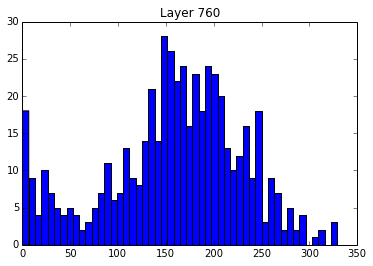

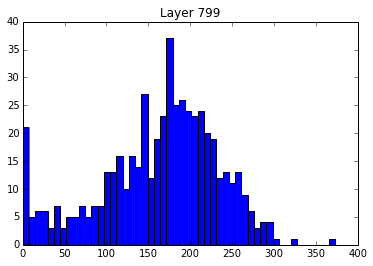

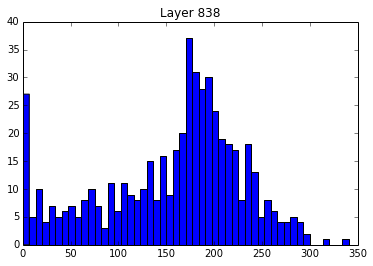

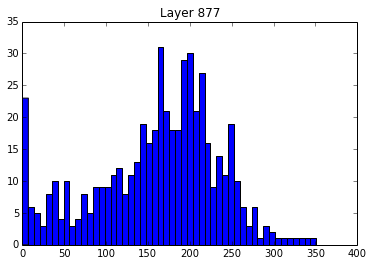

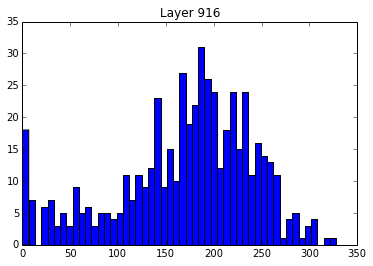

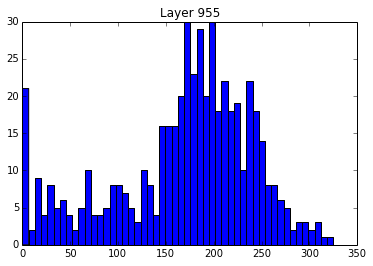

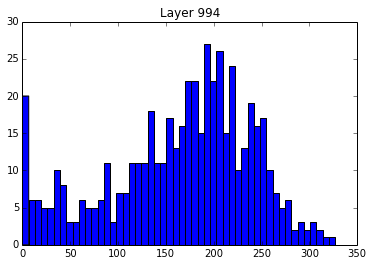

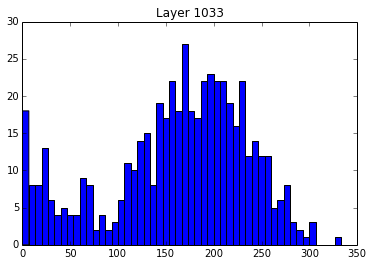

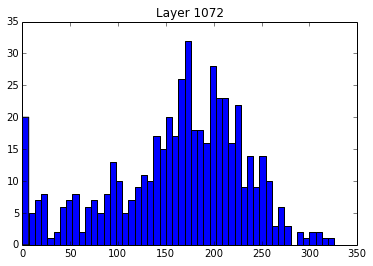

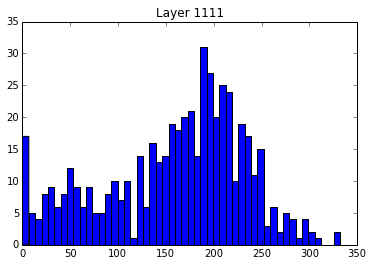

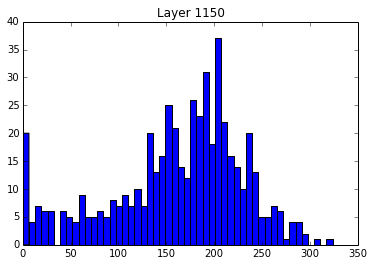

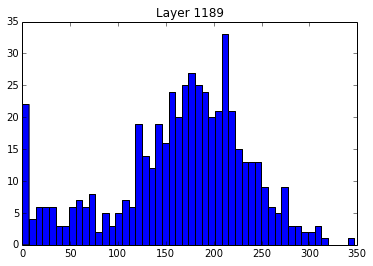

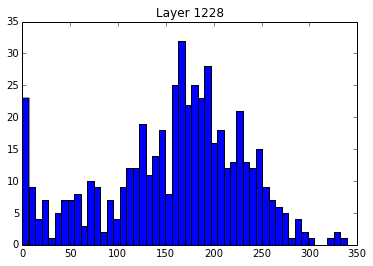

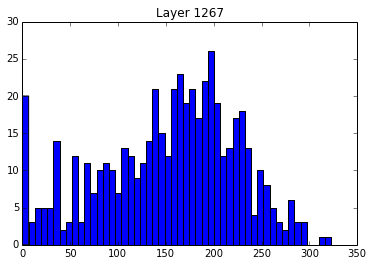

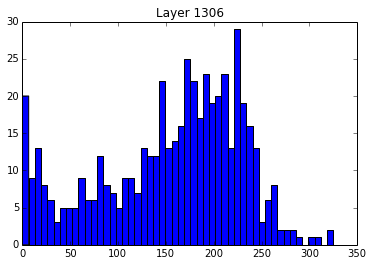

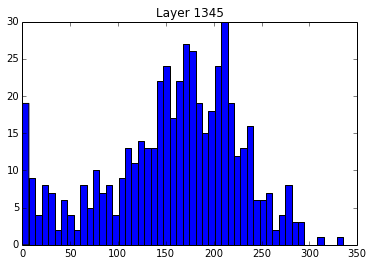

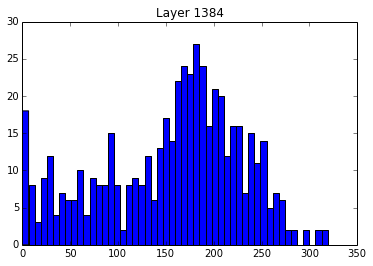

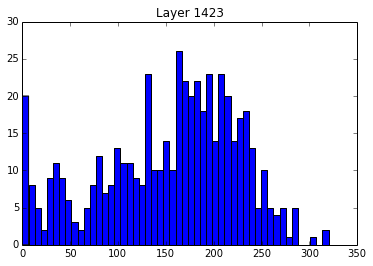

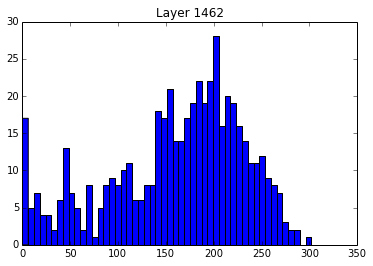

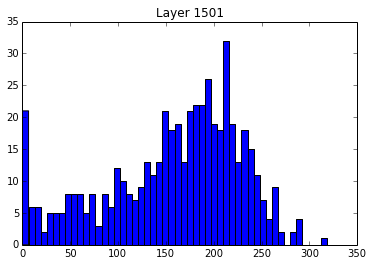

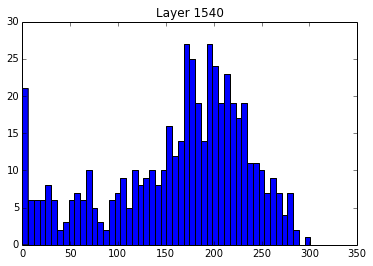

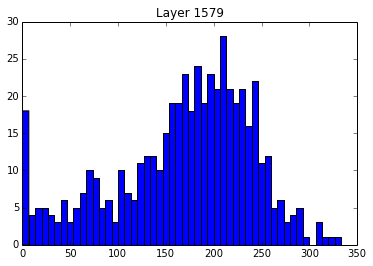

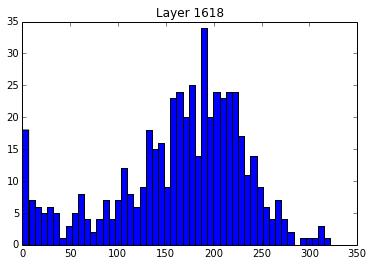

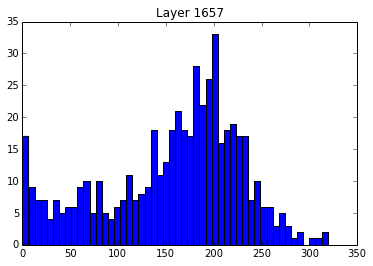

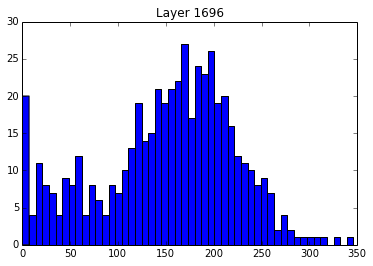

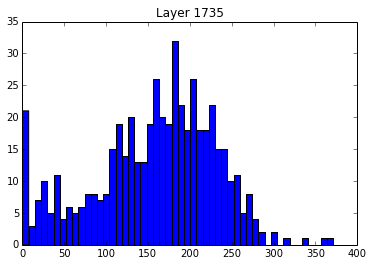

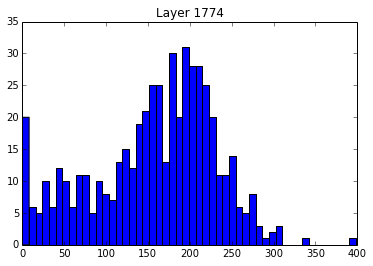

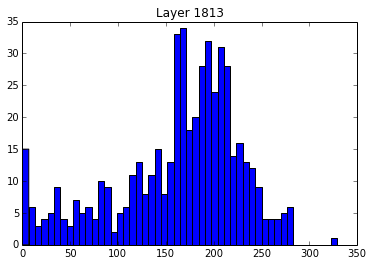

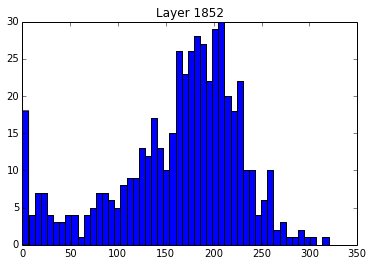

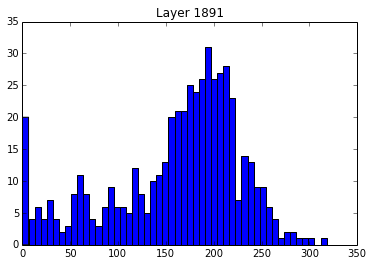

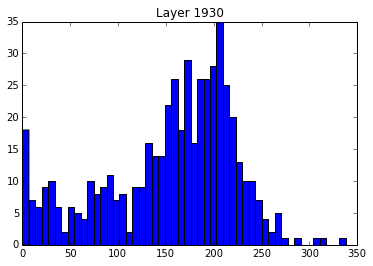

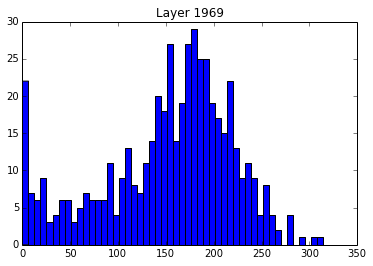

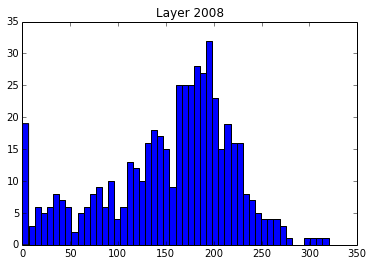

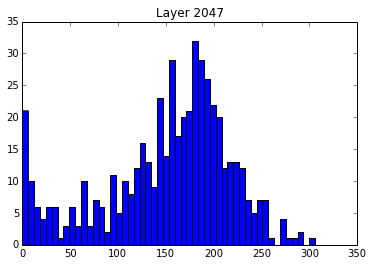

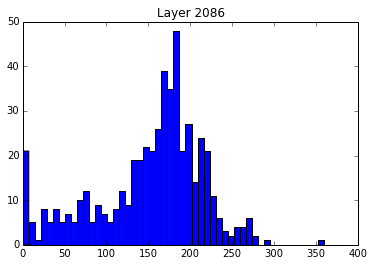

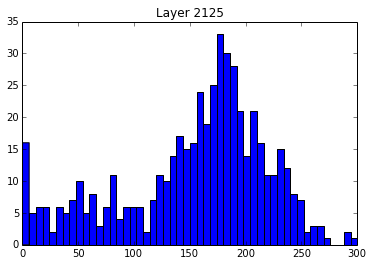

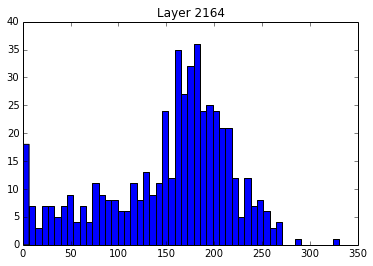

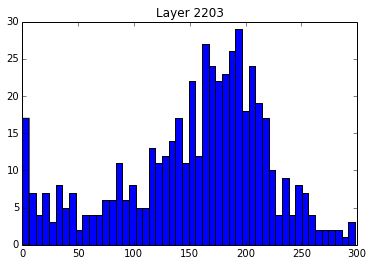

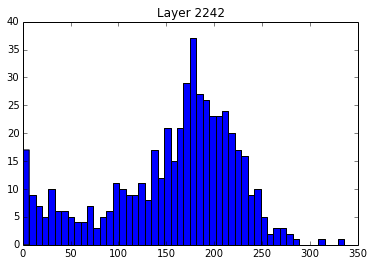

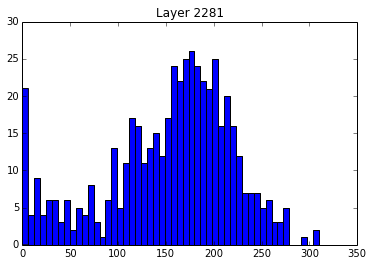

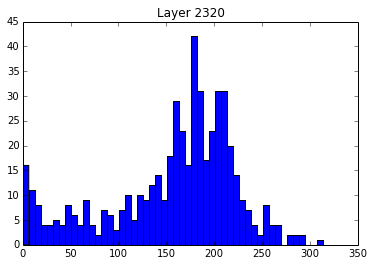

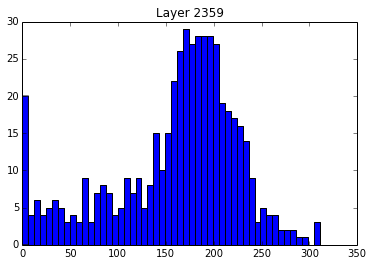

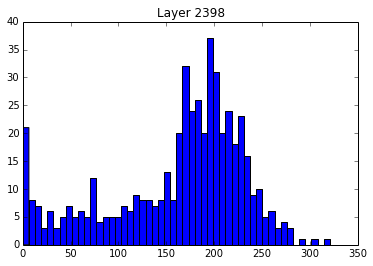

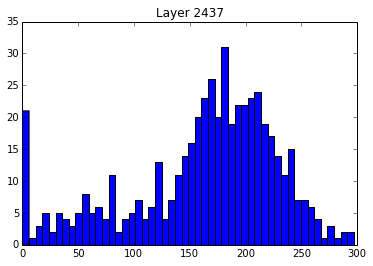

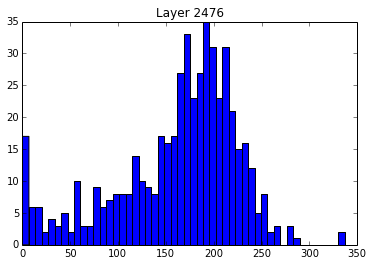

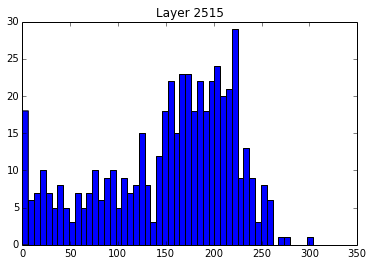

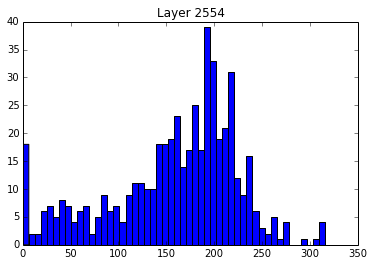

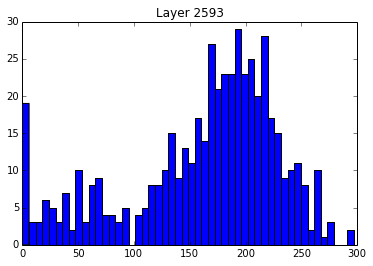

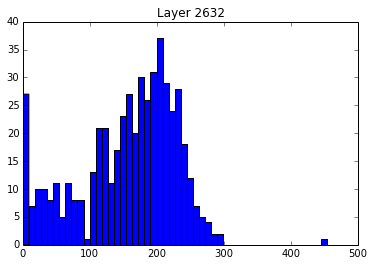

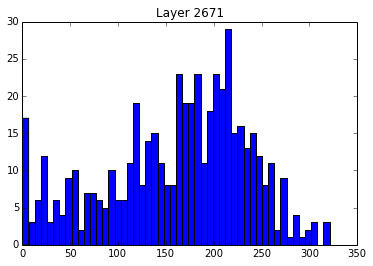

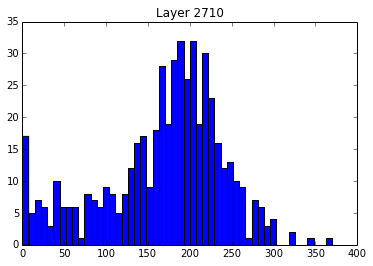

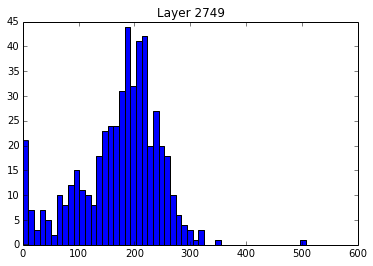

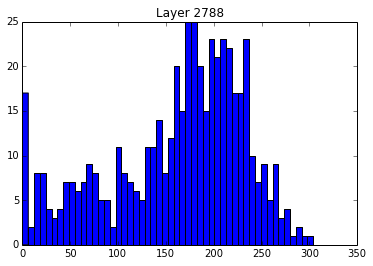

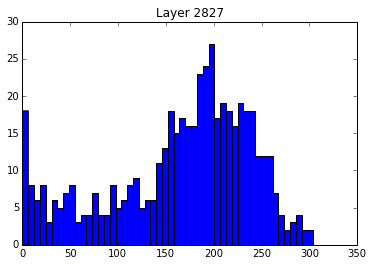

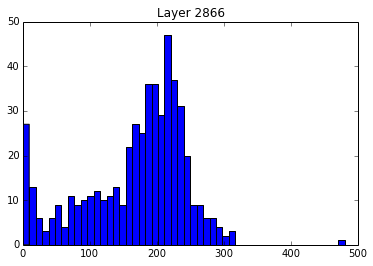

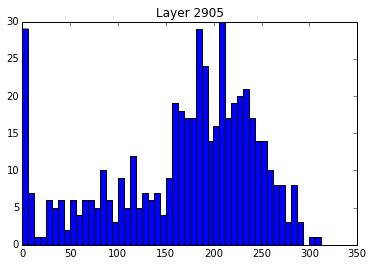

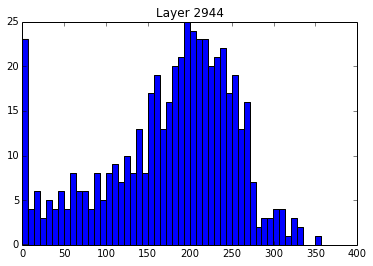

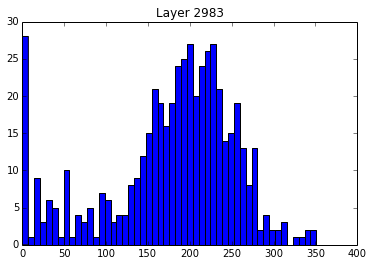

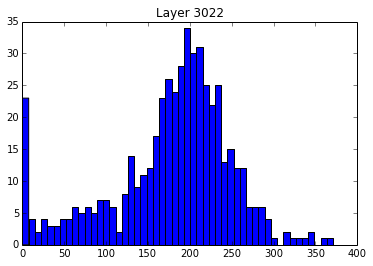

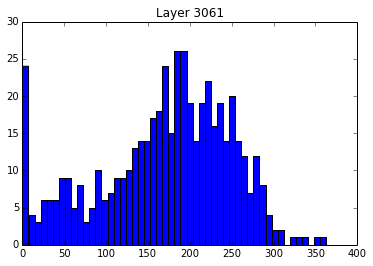

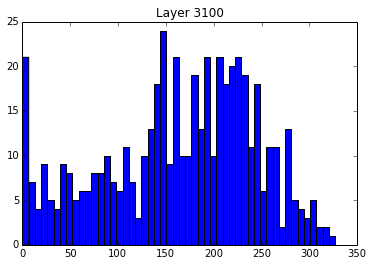

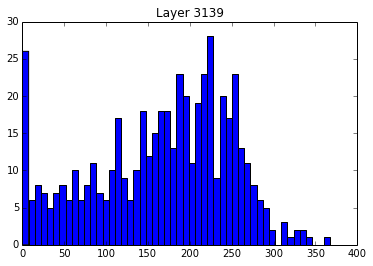

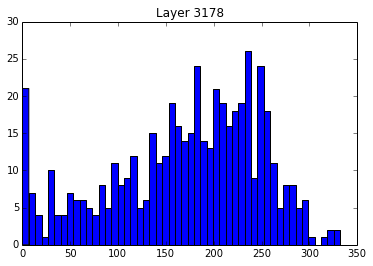

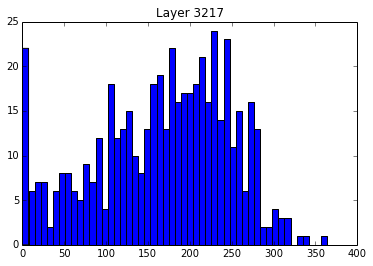

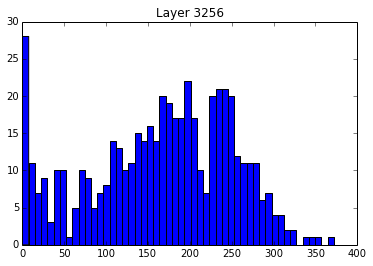

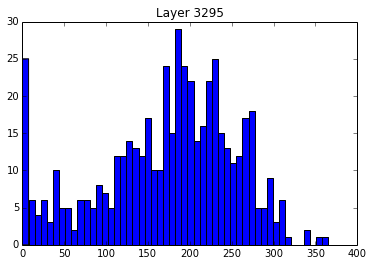

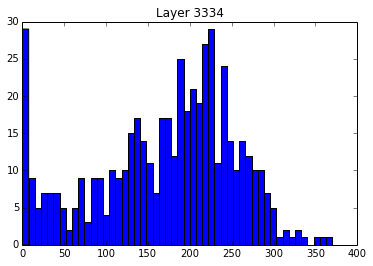

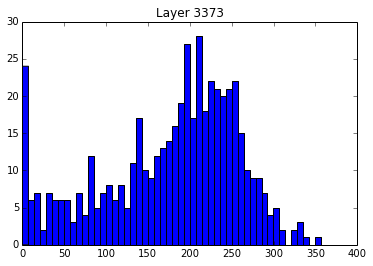

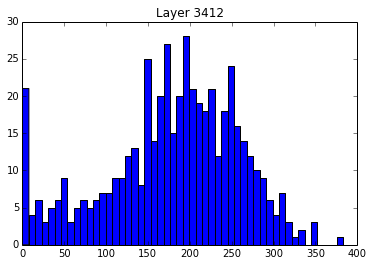

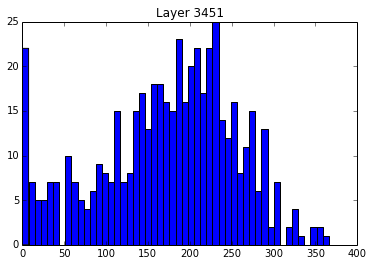

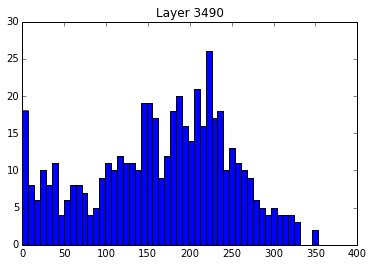

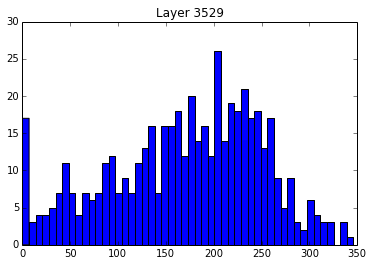

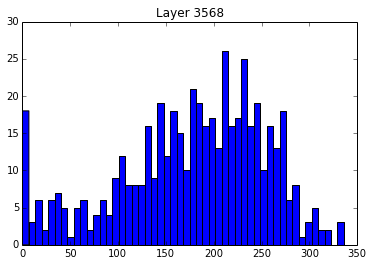

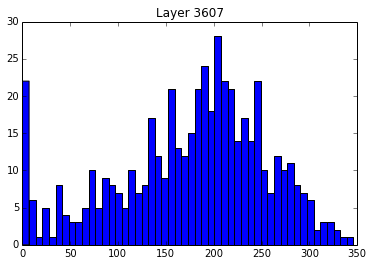

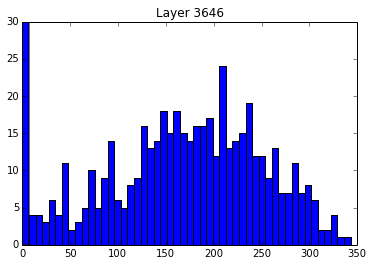

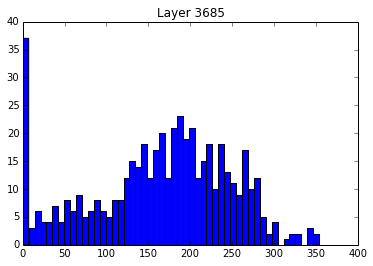

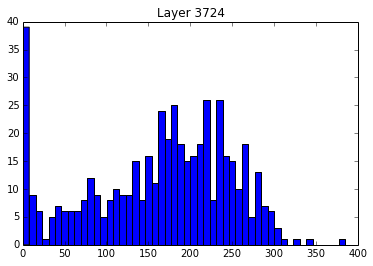

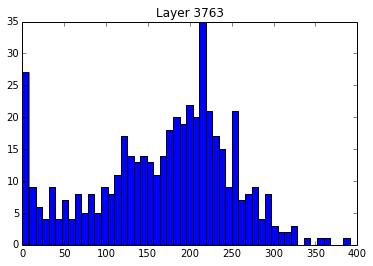

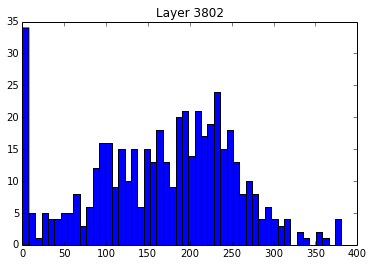

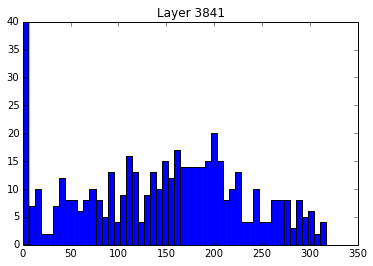

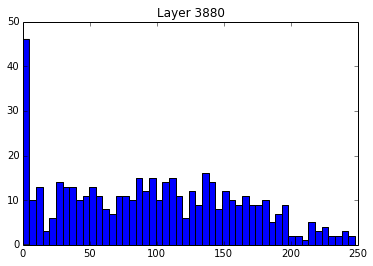

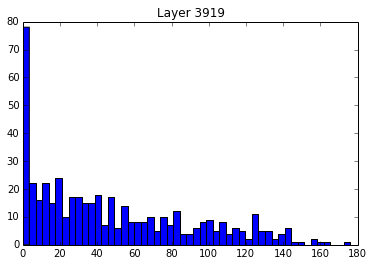

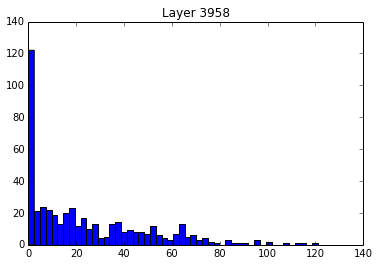

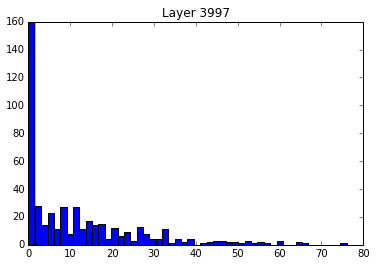

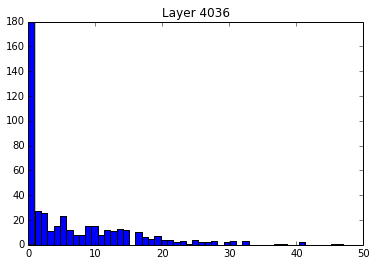

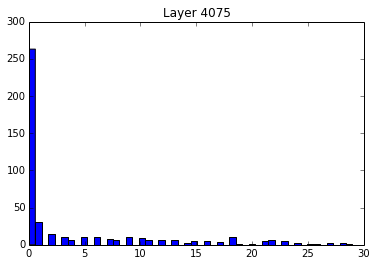

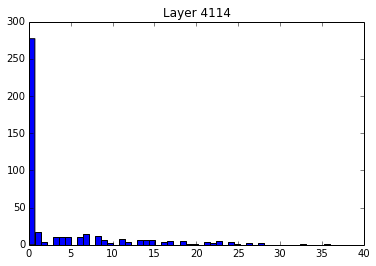

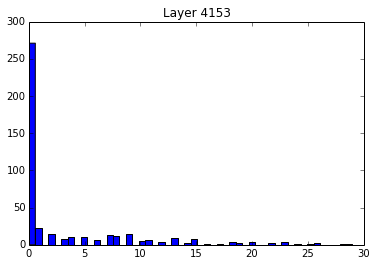

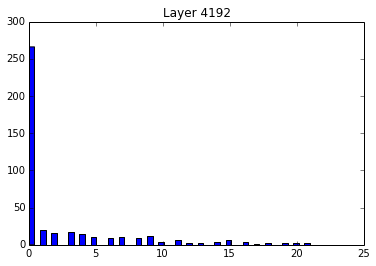

In [8]:
for i in sorted_x:
    unmaskedSynapses = ([r[-1] for r in rows if r[-2] != 0 if r[0] == i])
    plt.hist(unmaskedSynapses, bins=50)
    plt.title("Layer " + str(i))
    plt.show()

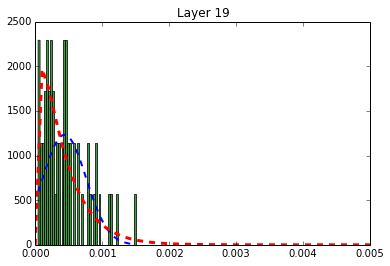

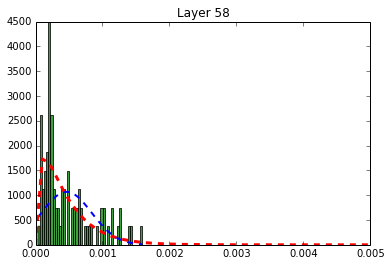

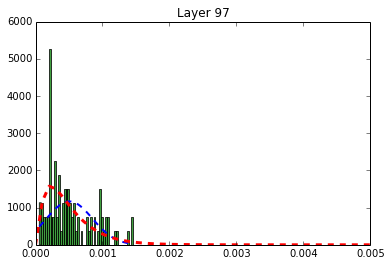

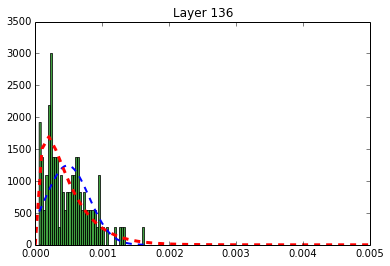

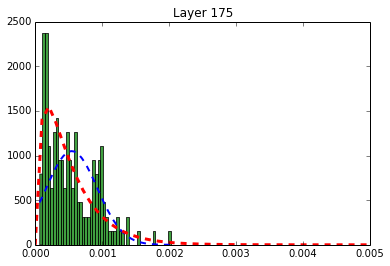

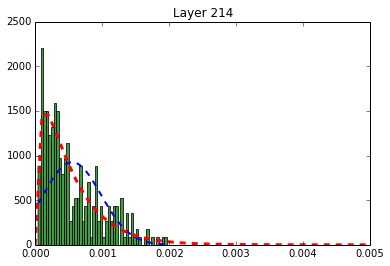

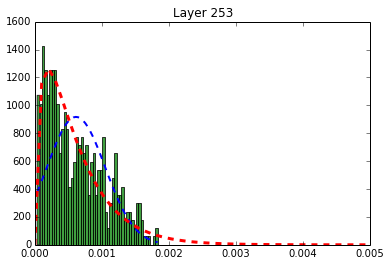

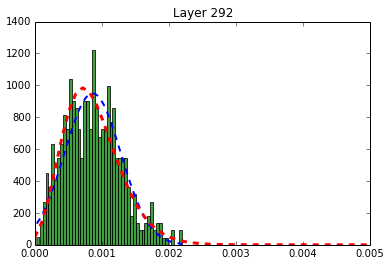

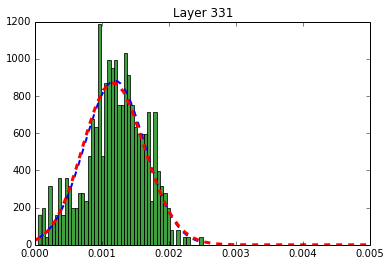

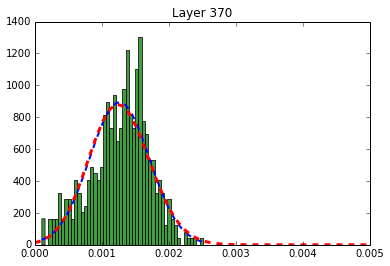

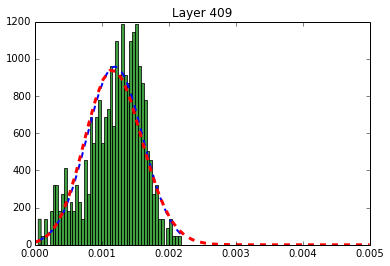

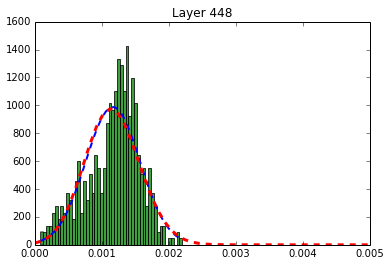

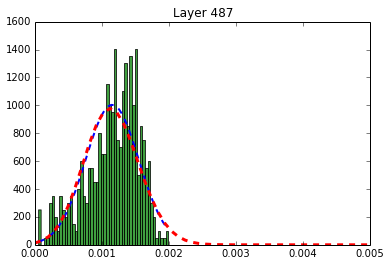

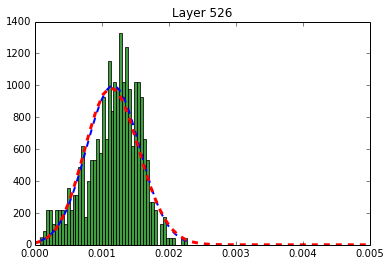

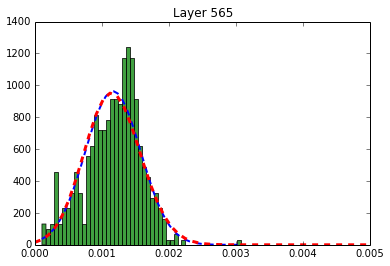

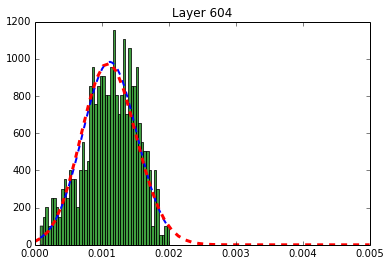

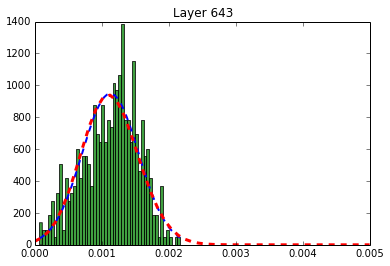

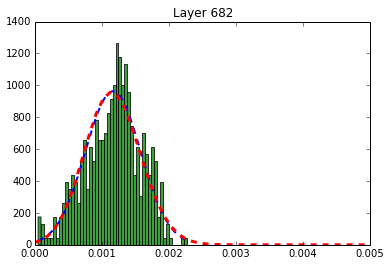

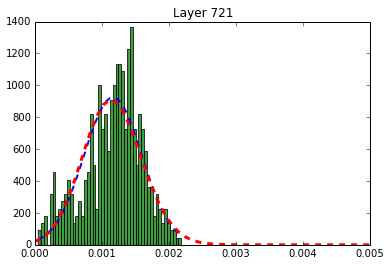

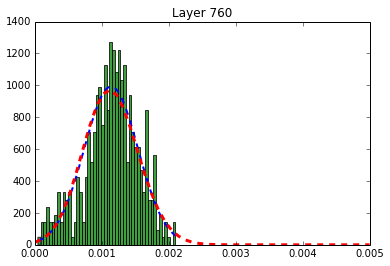

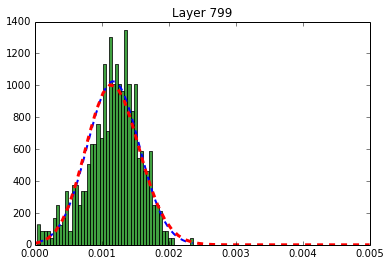

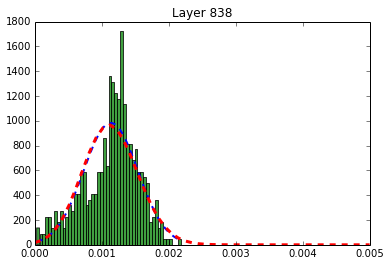

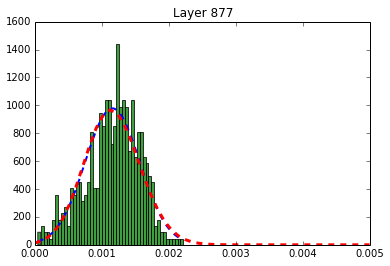

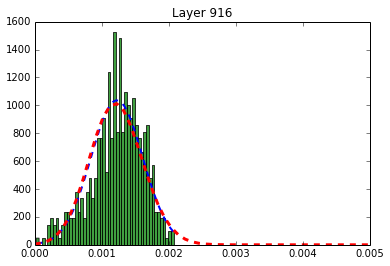

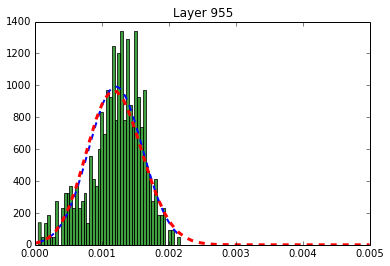

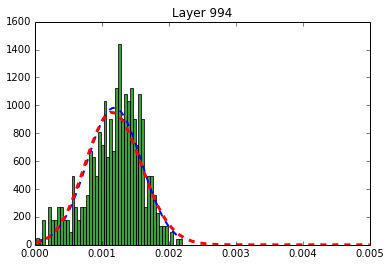

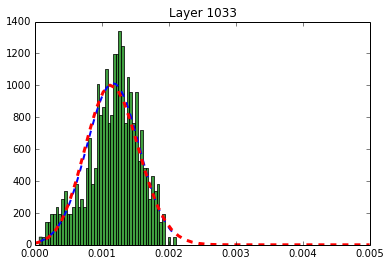

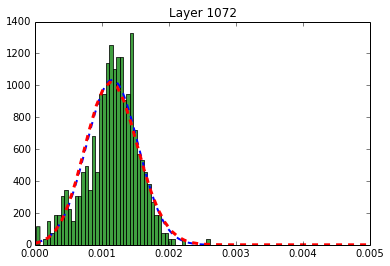

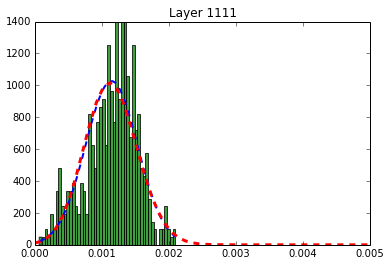

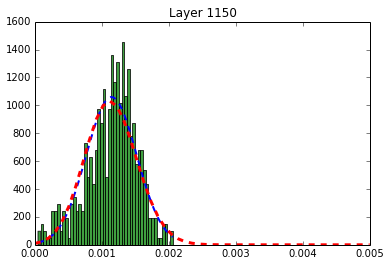

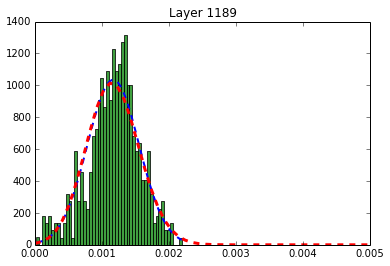

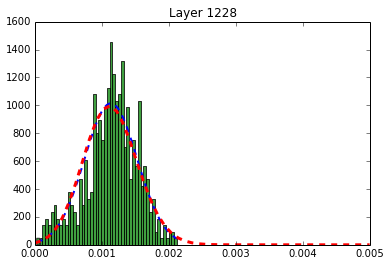

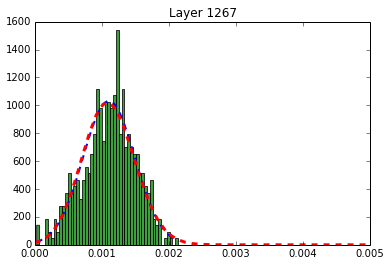

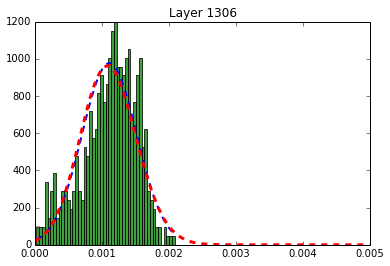

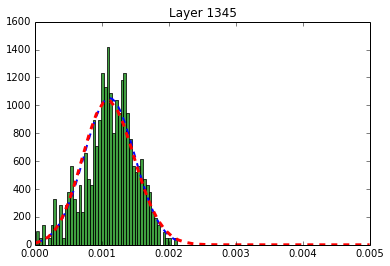

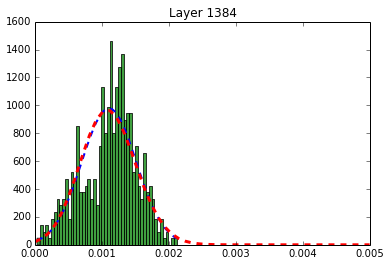

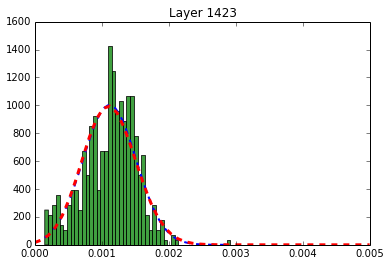

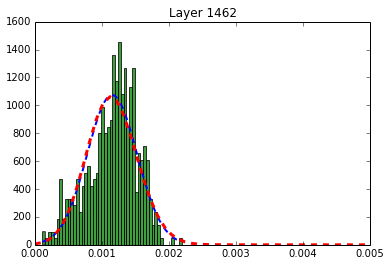

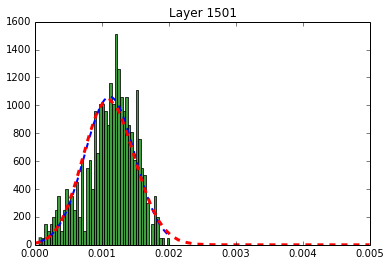

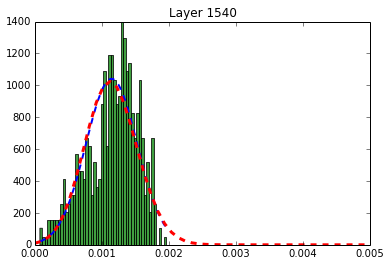

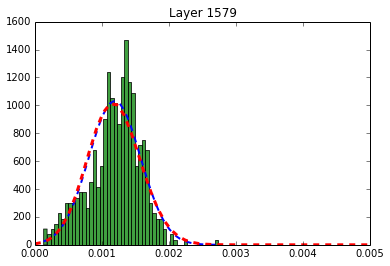

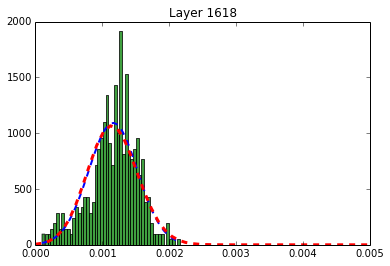

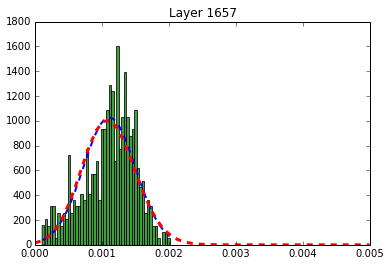

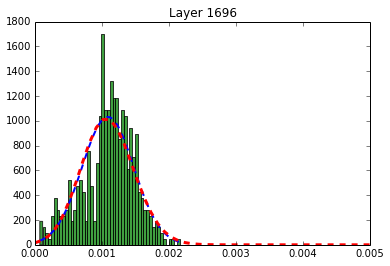

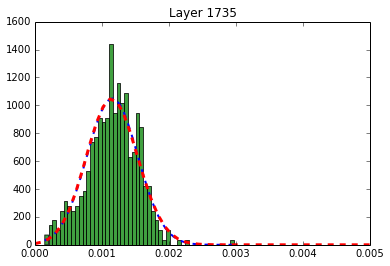

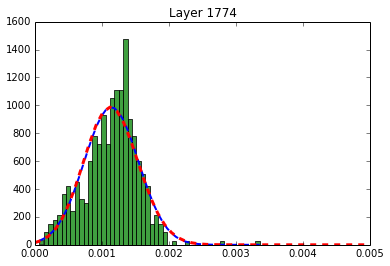

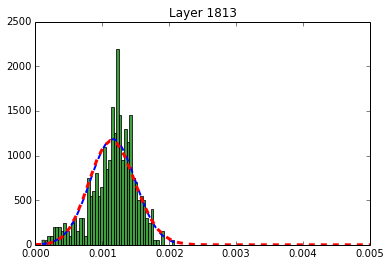

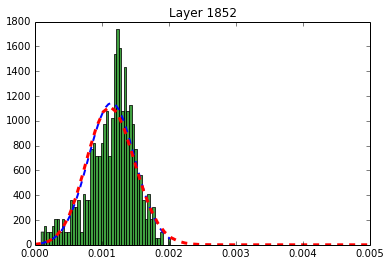

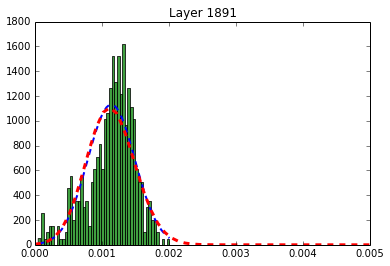

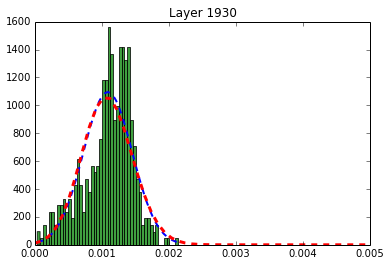

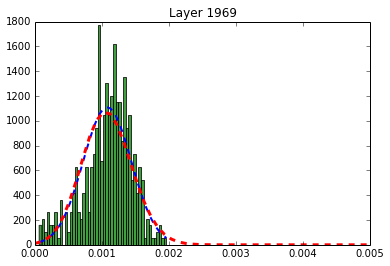

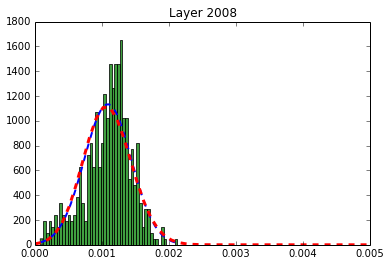

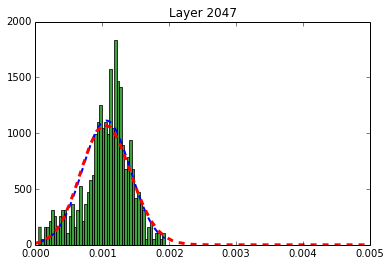

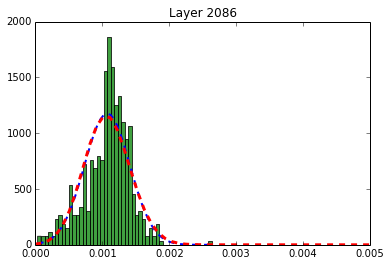

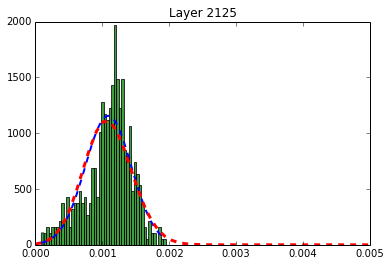

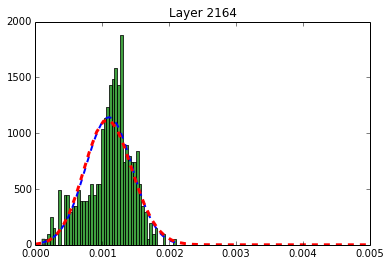

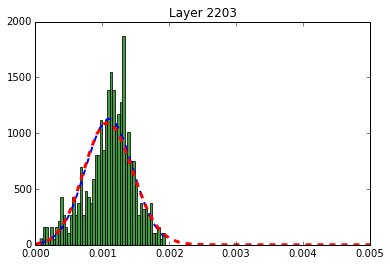

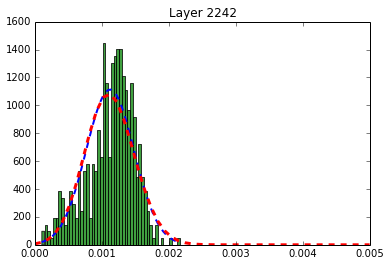

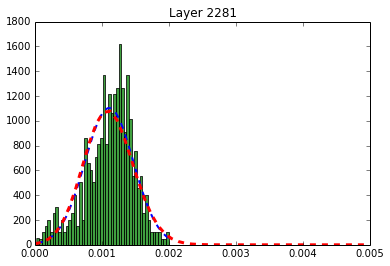

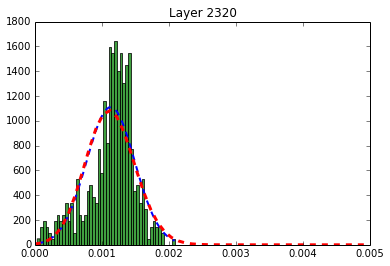

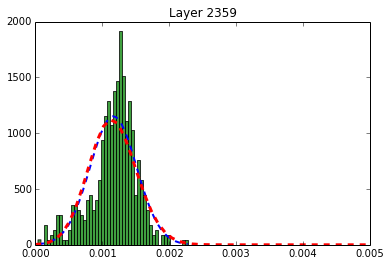

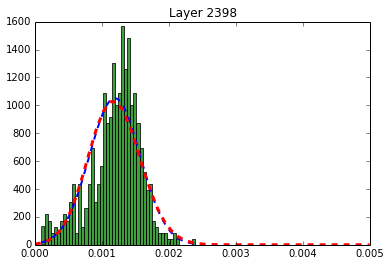

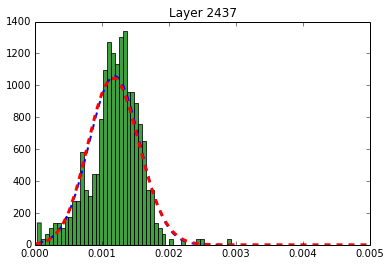

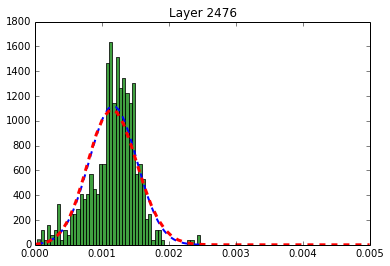

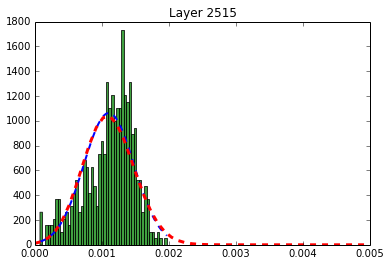

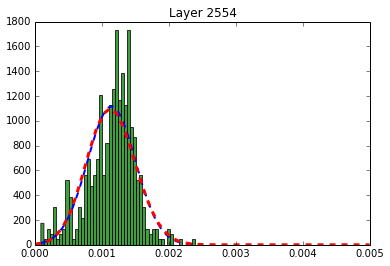

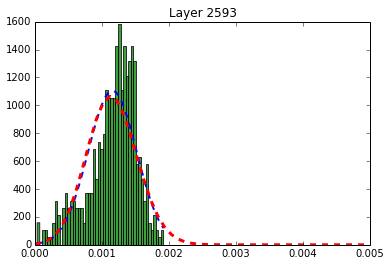

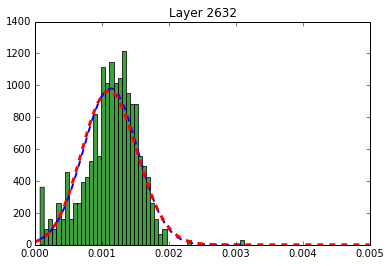

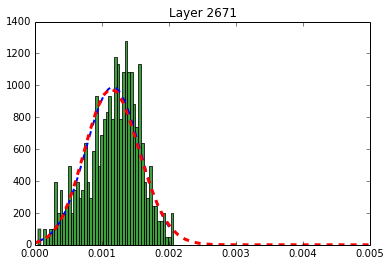

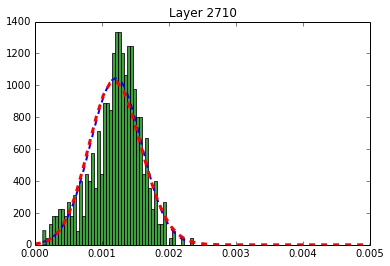

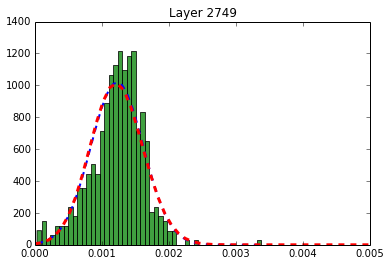

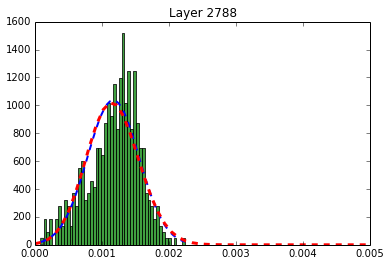

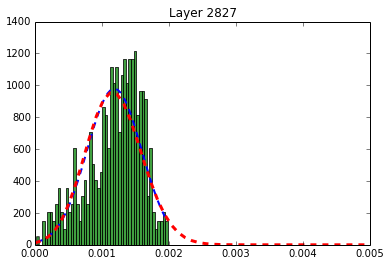

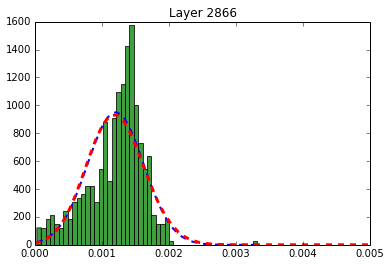

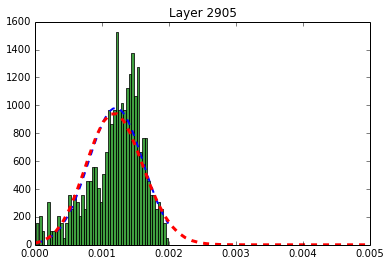

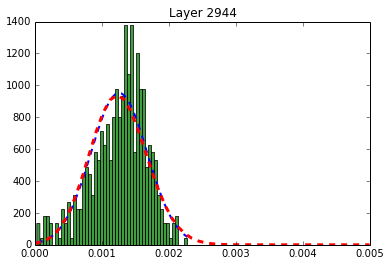

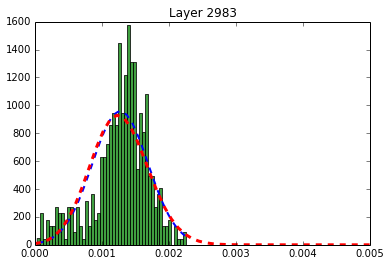

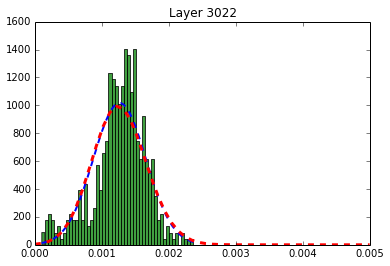

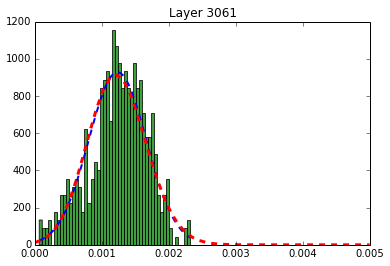

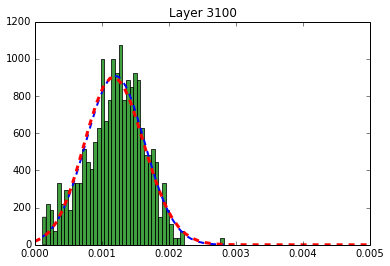

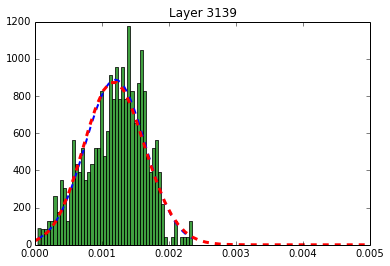

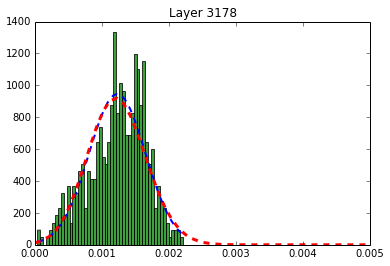

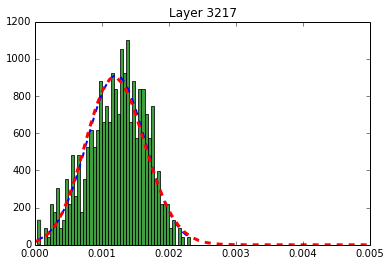

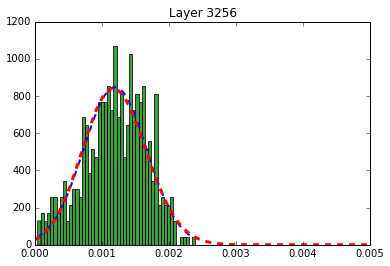

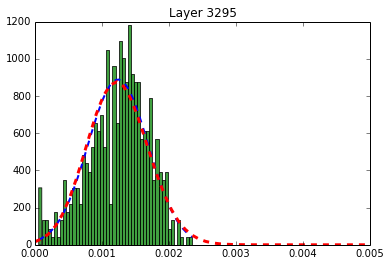

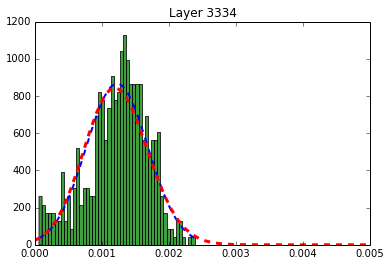

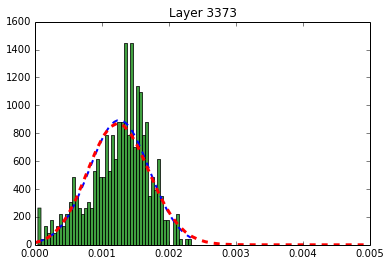

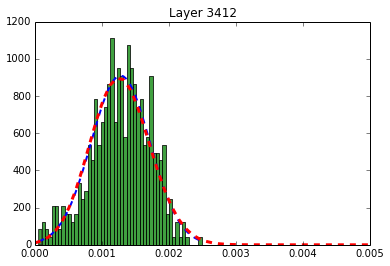

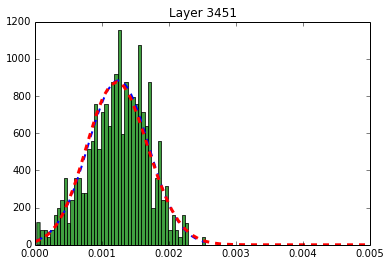

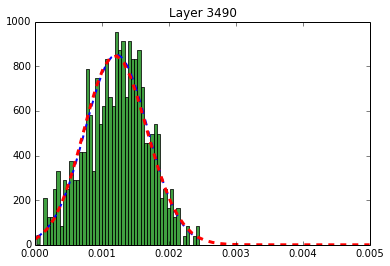

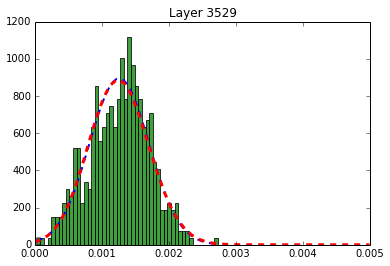

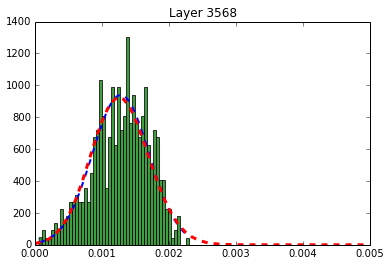

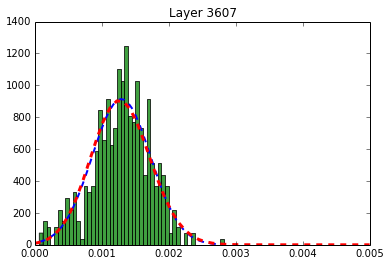

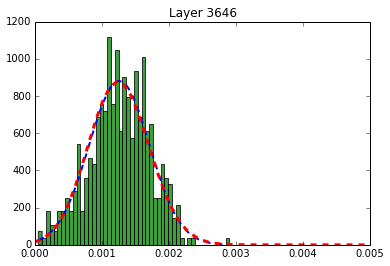

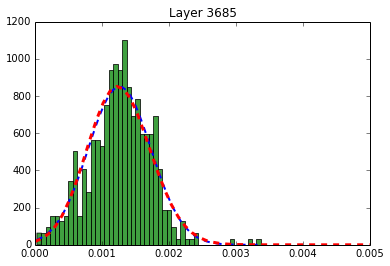

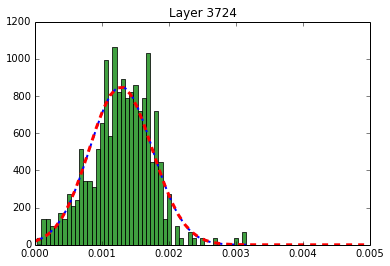

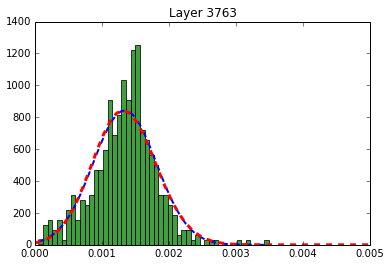

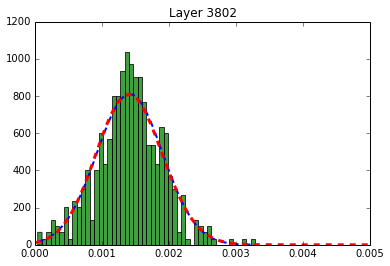

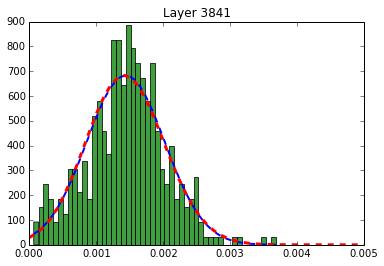

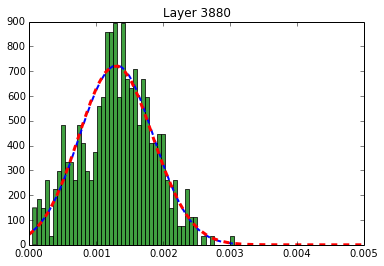

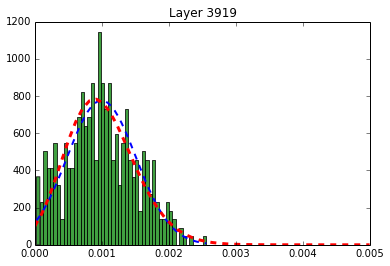

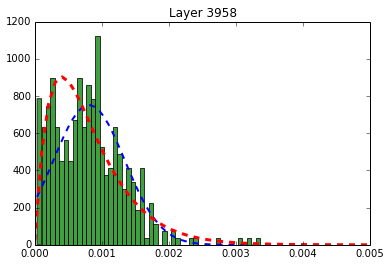

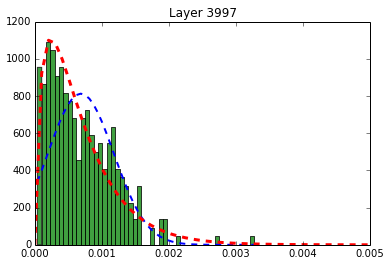

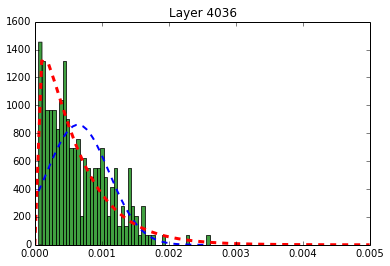

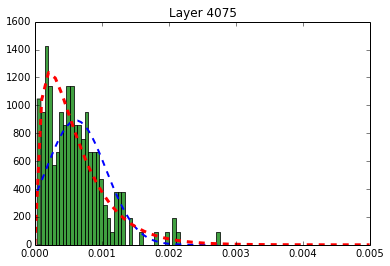

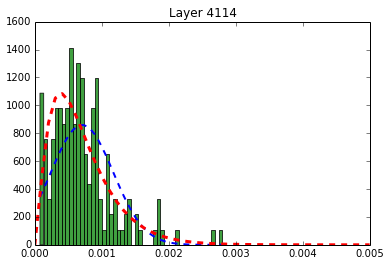

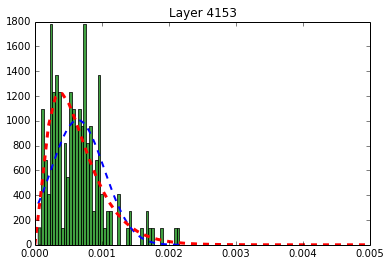

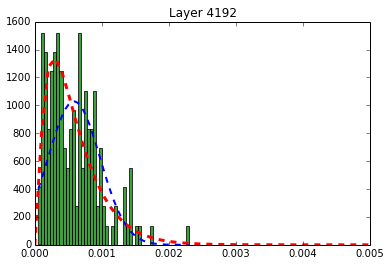

In [5]:
#take into account unmasked for each layer
#Both Gaussian and Gamma give somewhat nice curves



for i in sorted_x:
    s = []
    for r in rows:
        if r[-2] != 0:
            if r[-1] !=0:
                if r[0] == i:
                    s.append(float(r[-1])/float(r[-2]))
                    
    # the histogram of the data
    n, bins, patches = plt.hist(s, 50, normed=1, facecolor='green', alpha=0.75)
    
    #GAUSSIAN
    # best fit of data normal curve (gaussian)
    (mu, sigma) = norm.fit(s)
    # add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'b--', linewidth=2)
    
    #GAMMA
    alpha, loc, beta=stats.gamma.fit(s)
    #print alpha, loc, beta
    rv = stats.gamma(alpha,loc,beta)
    x = np.linspace(0,.005)
    plt.plot(x, rv.pdf(x),'r--', lw=3)
    plt.title("Layer " + str(i))
    plt.show()

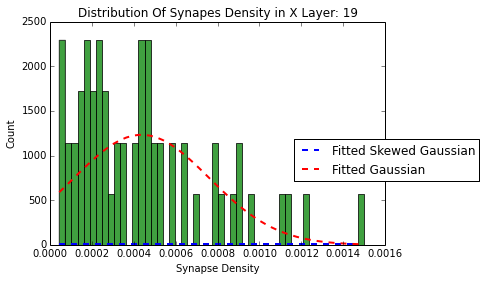

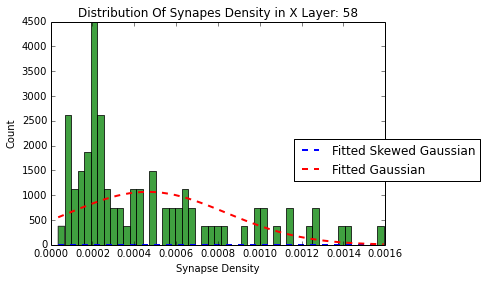

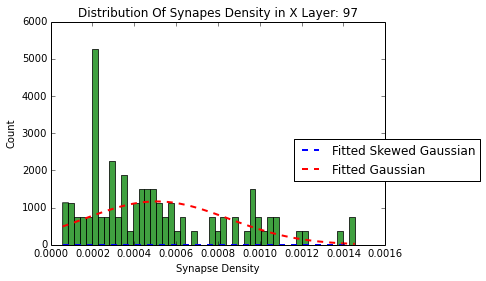

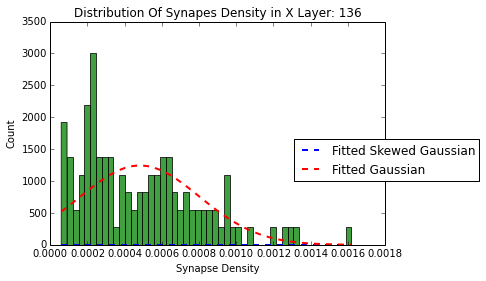

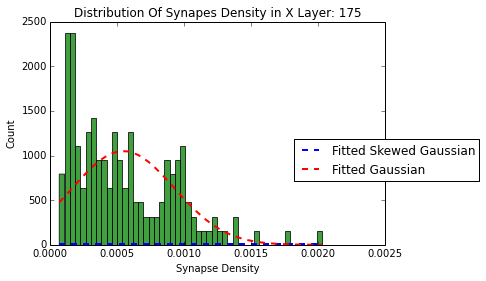

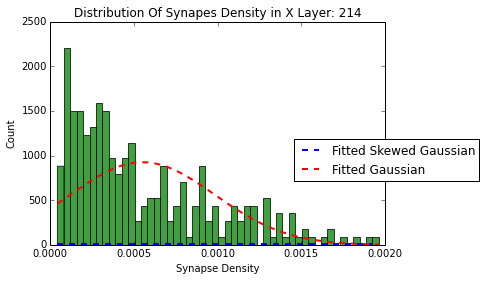

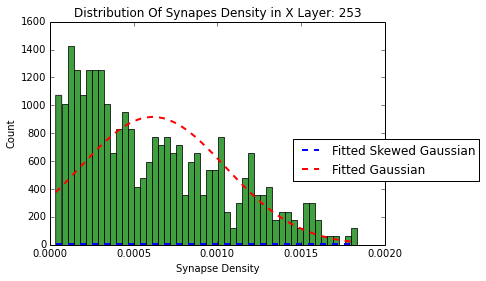

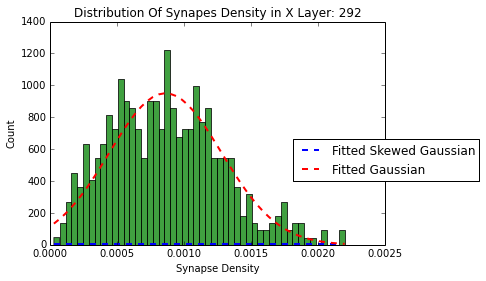

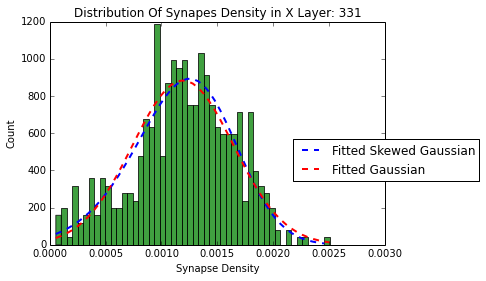

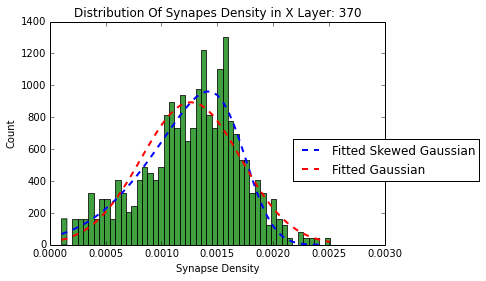

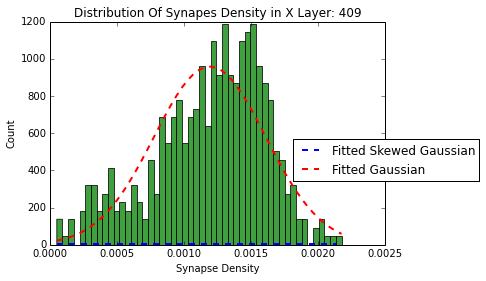

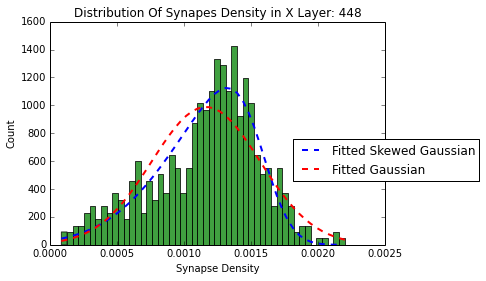

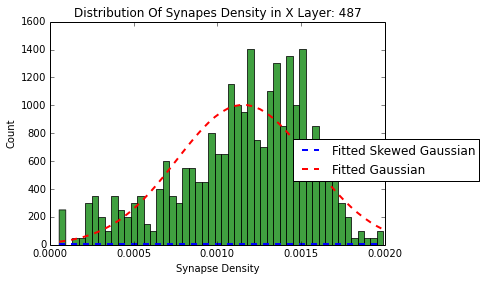

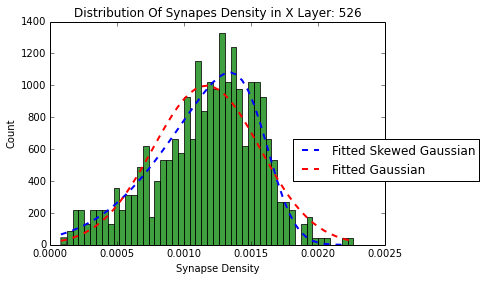

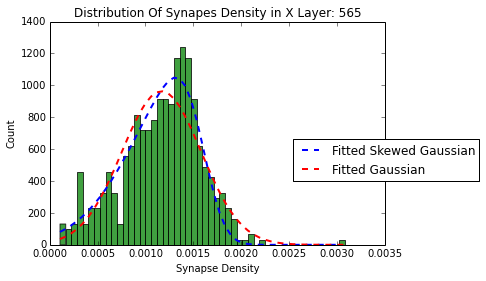

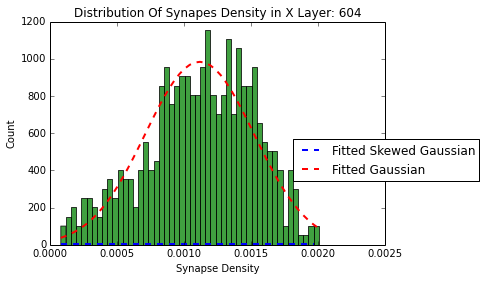

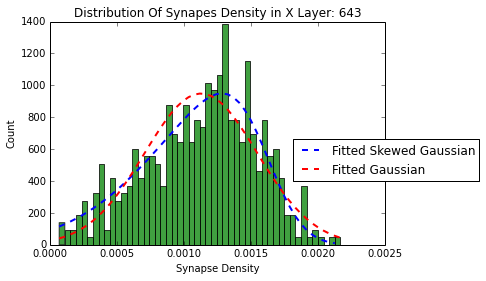

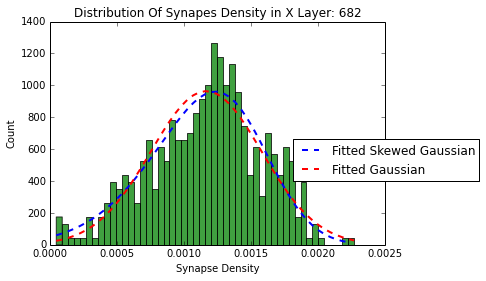

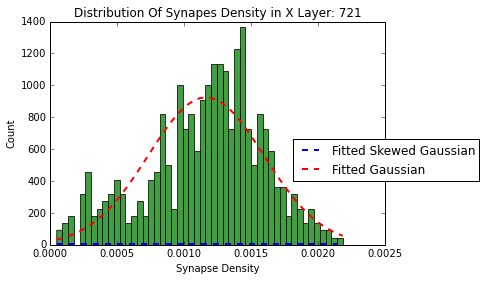

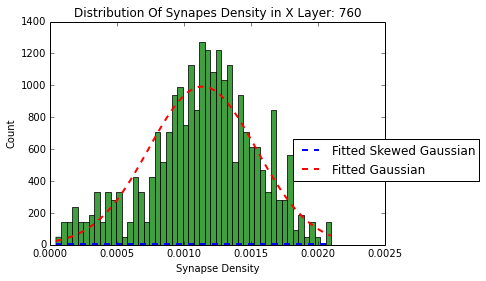

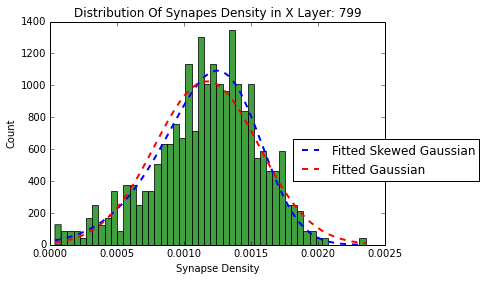

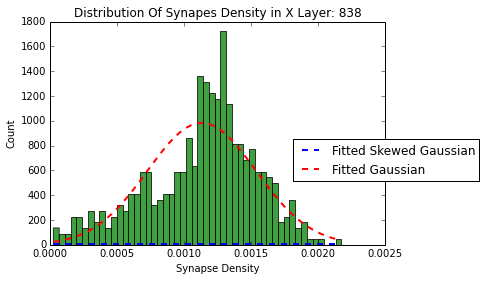

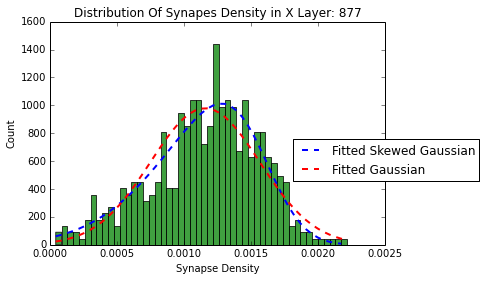

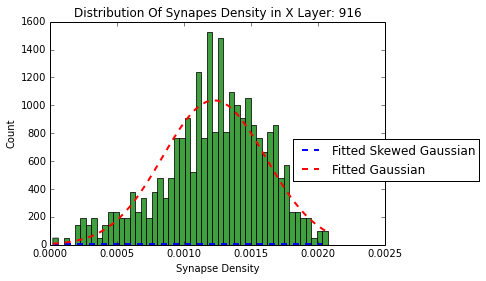

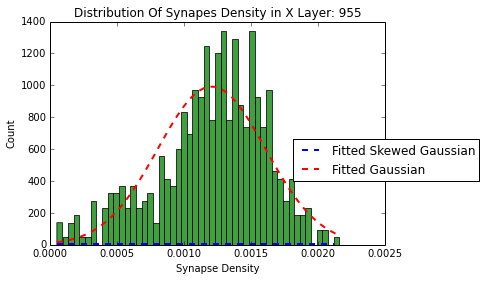

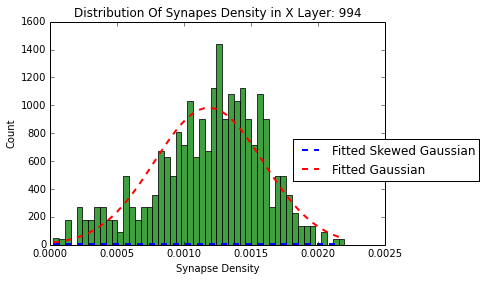

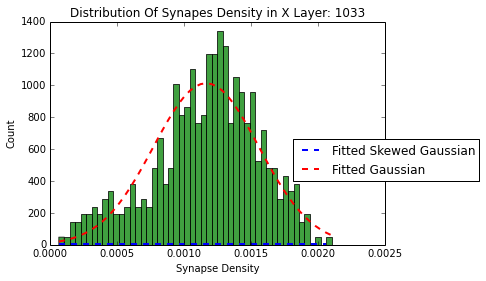

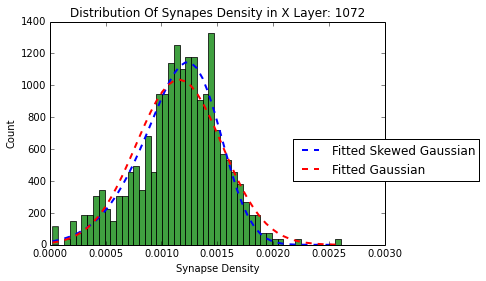

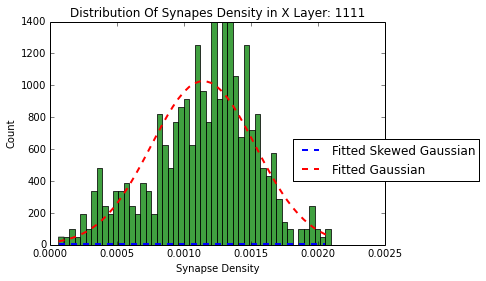

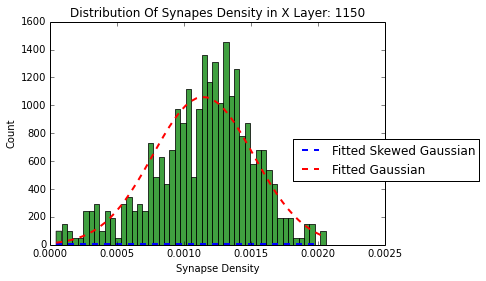

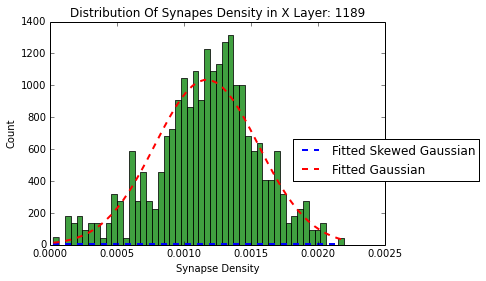

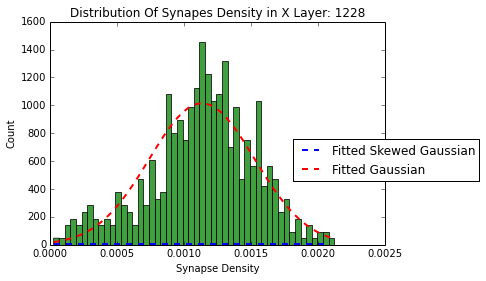

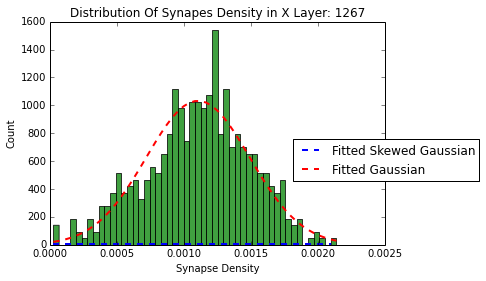

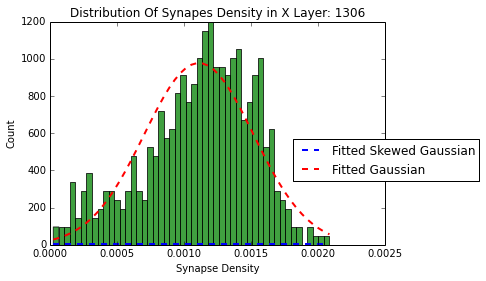

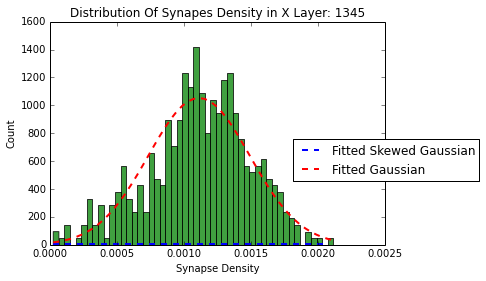

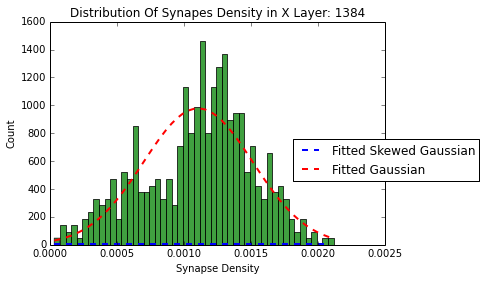

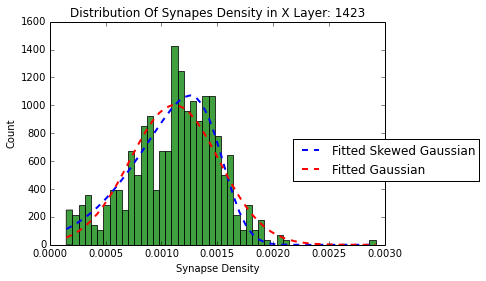

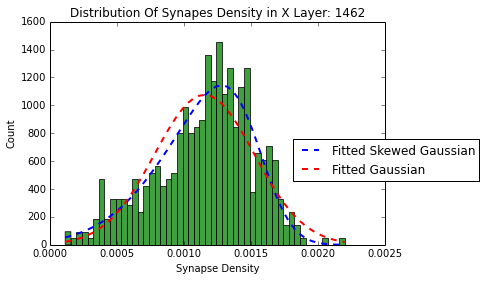

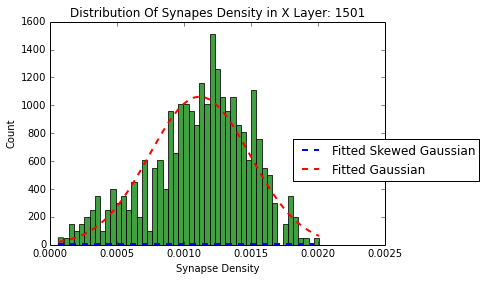

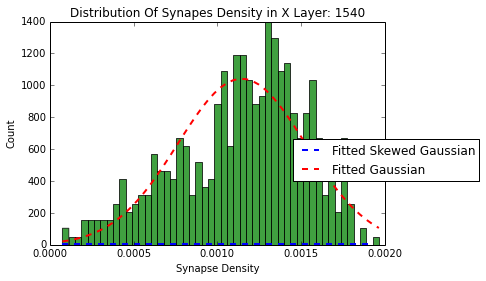

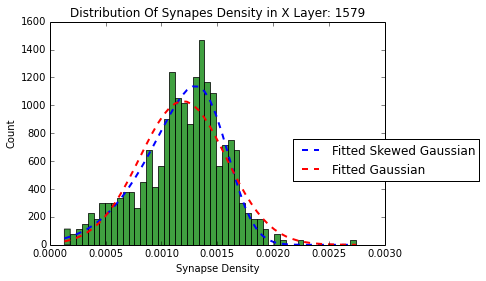

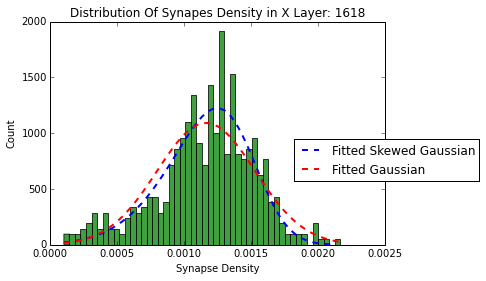

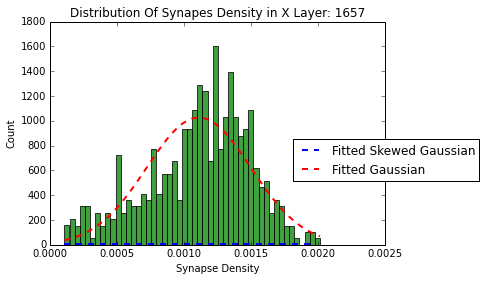

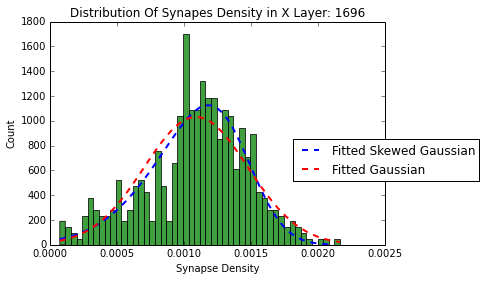

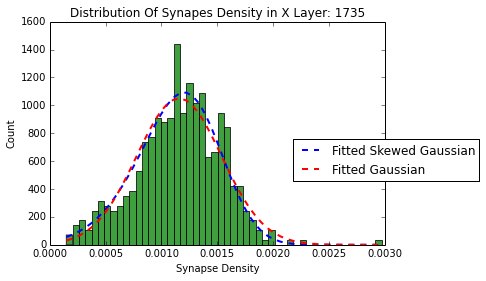

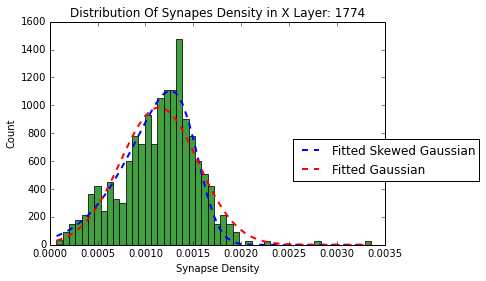

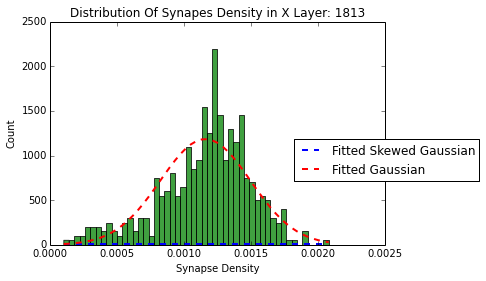

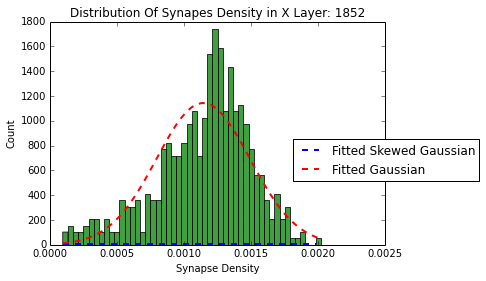

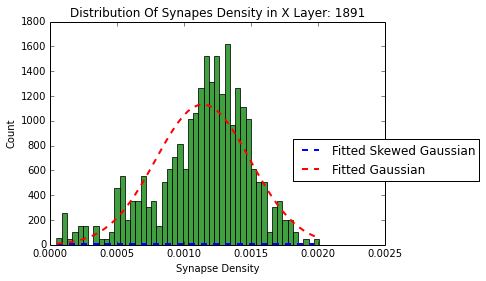

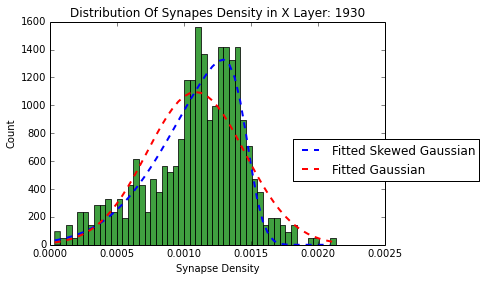

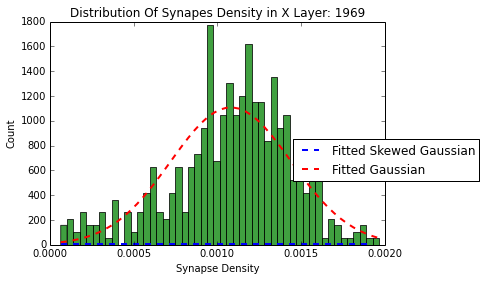

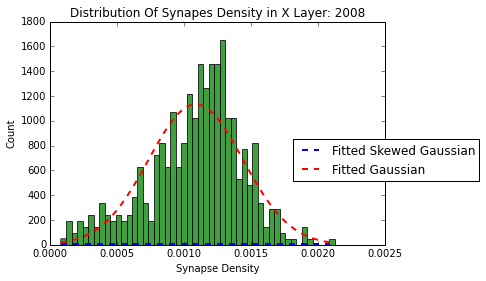

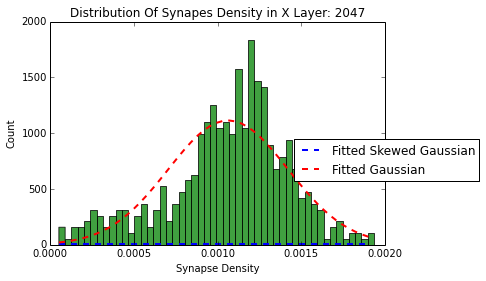

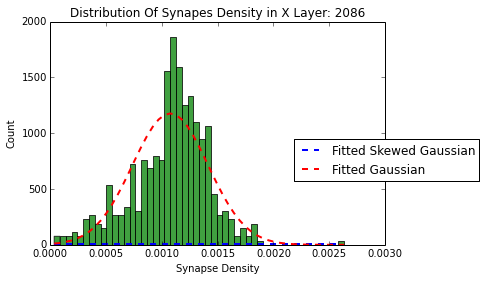

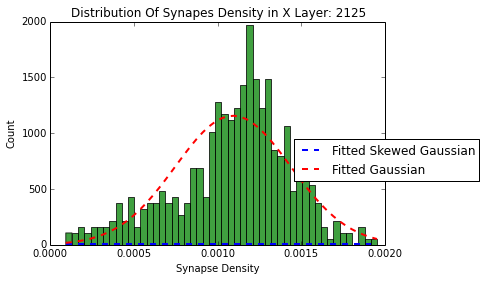

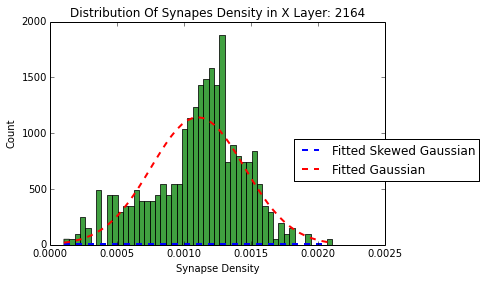

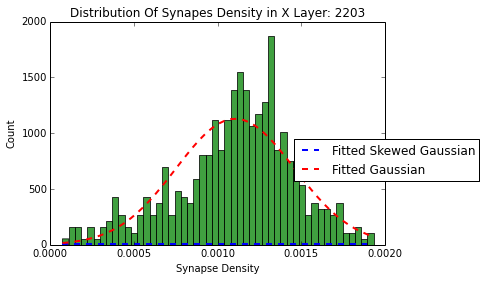

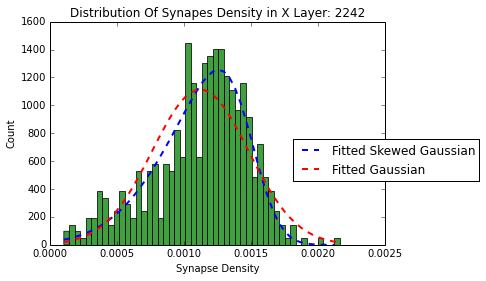

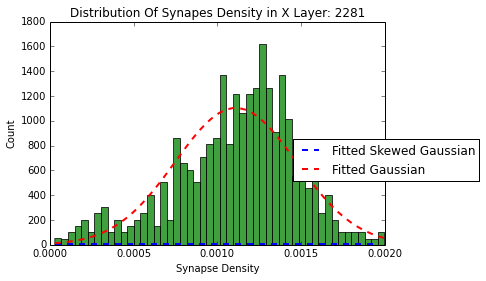

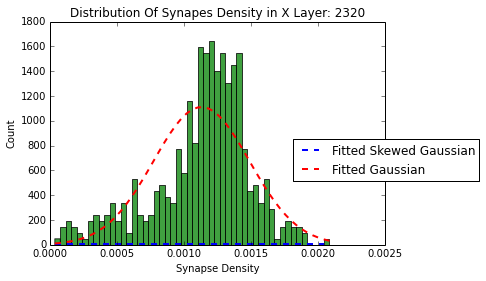

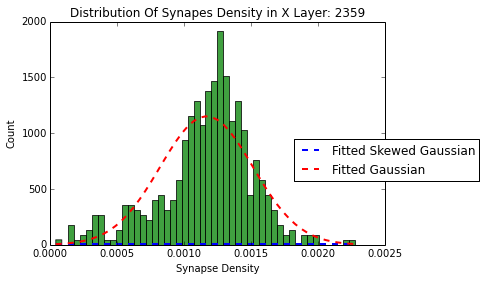

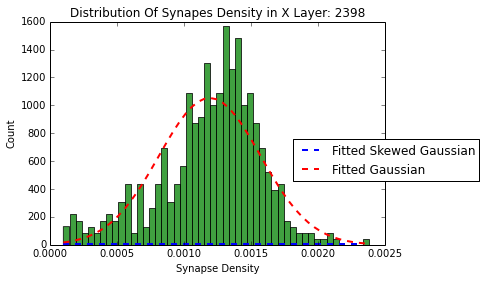

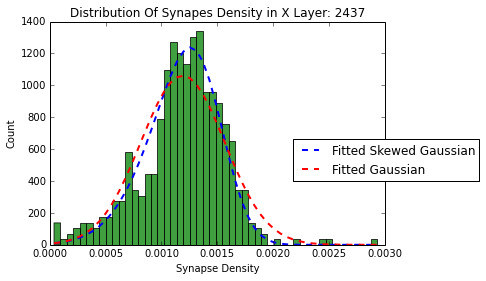

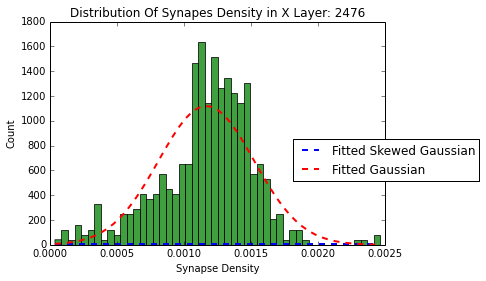

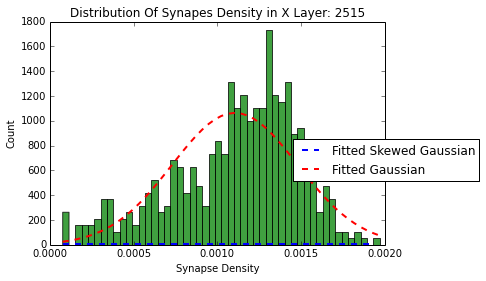

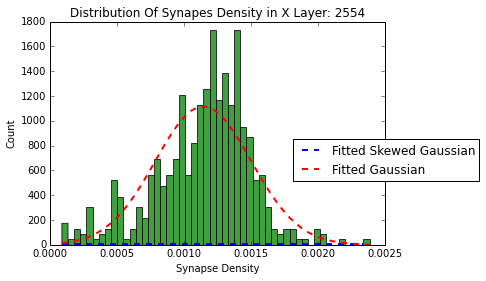

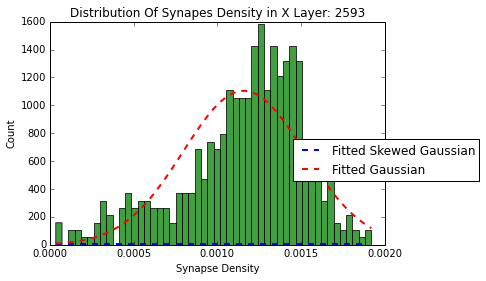

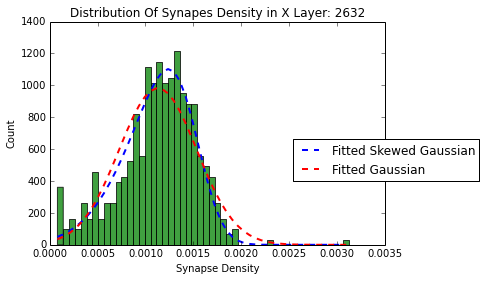

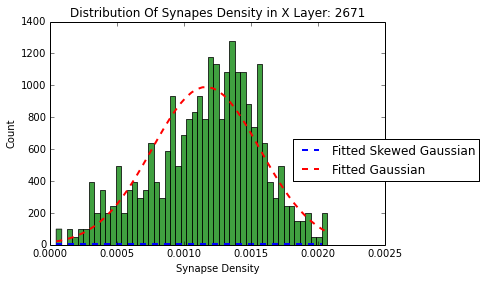

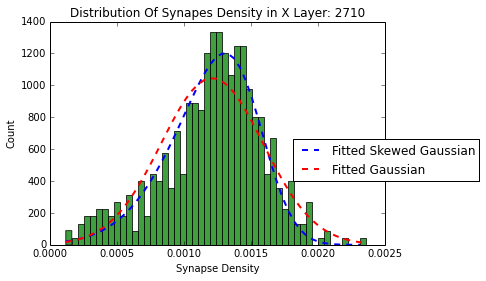

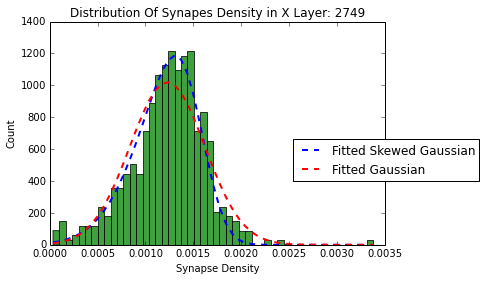

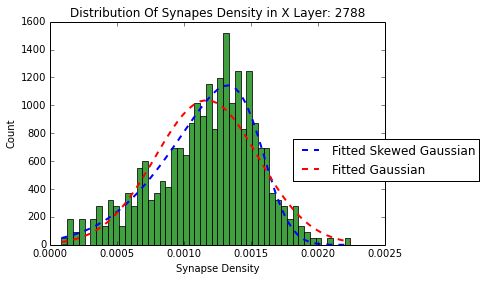

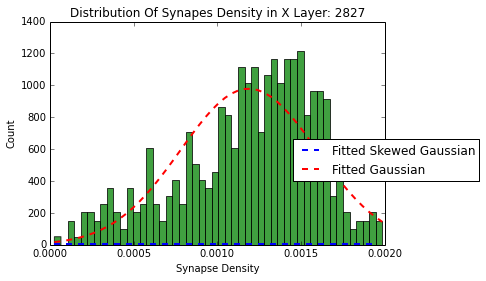

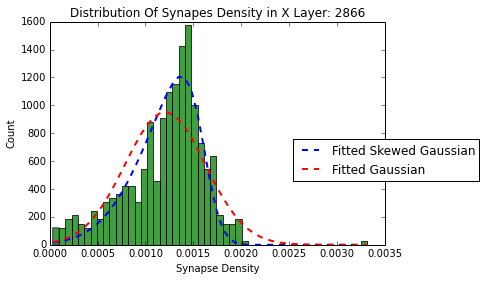

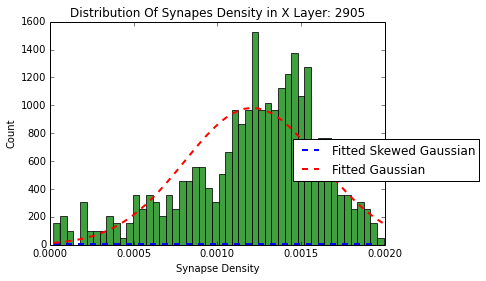

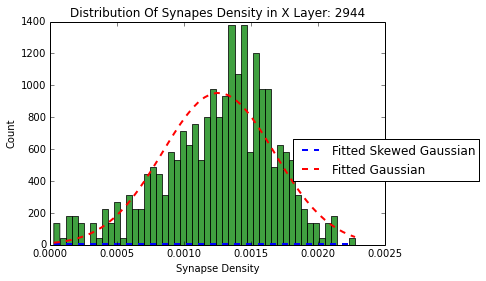

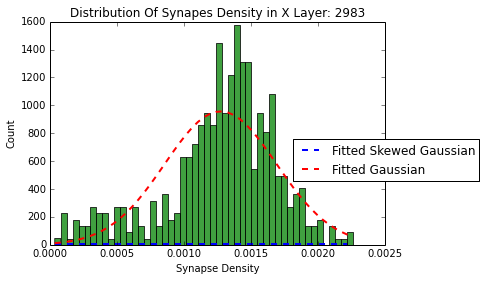

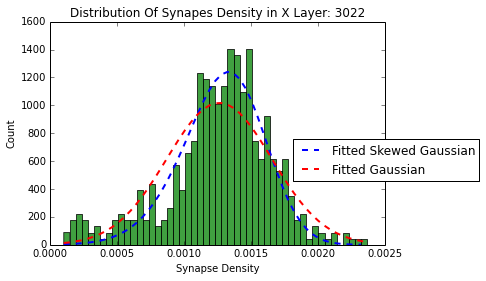

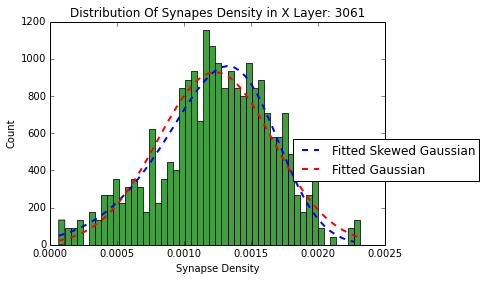

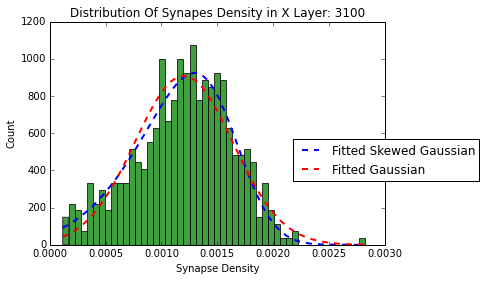

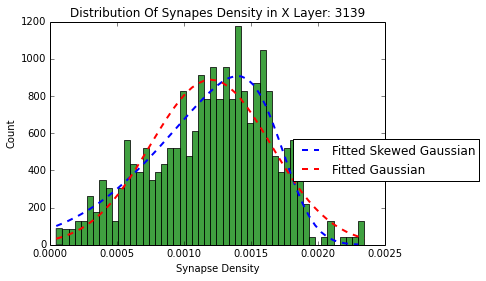

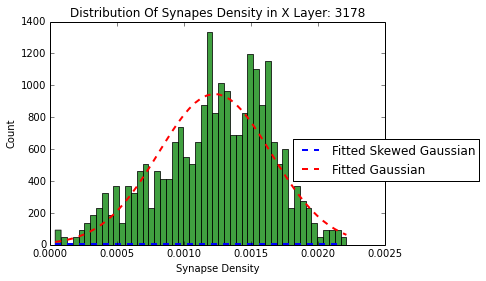

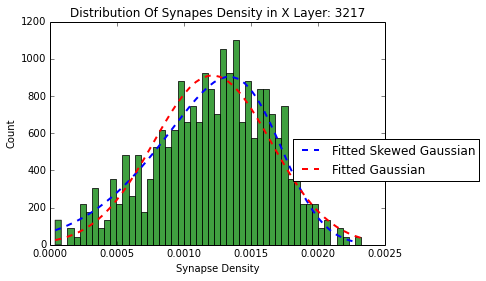

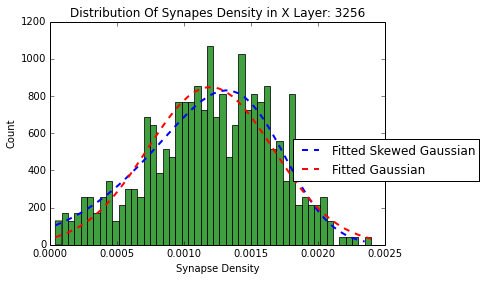

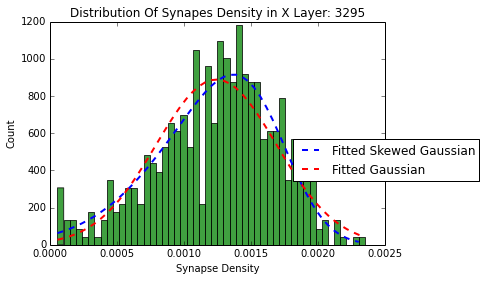

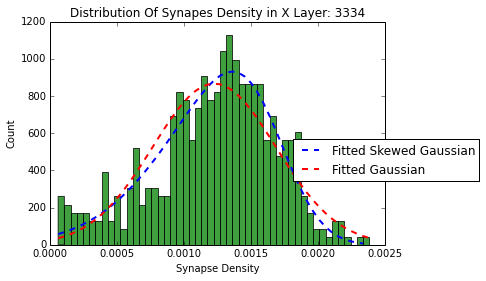

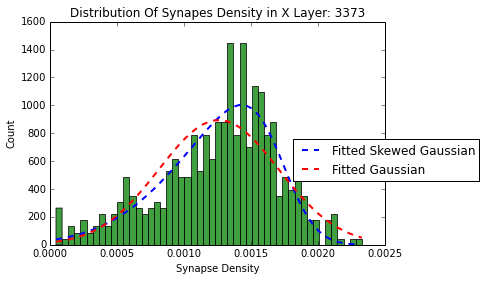

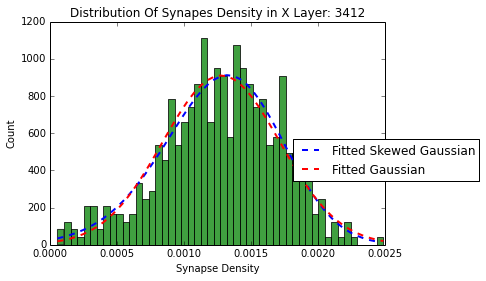

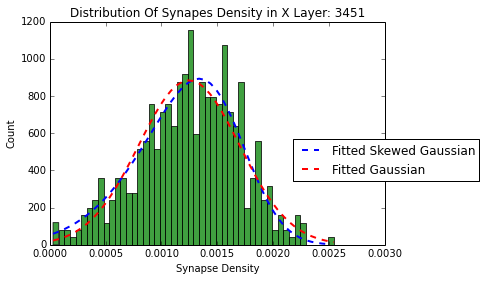

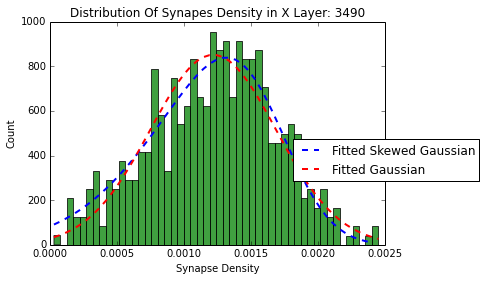

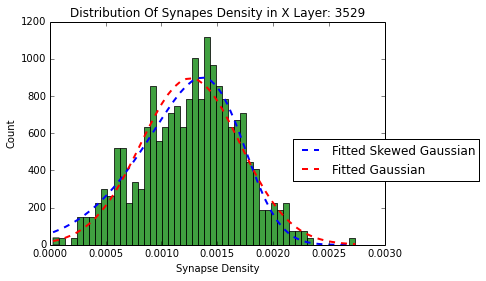

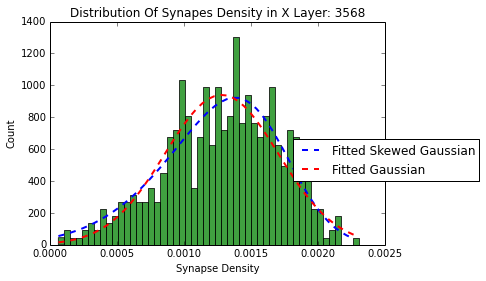

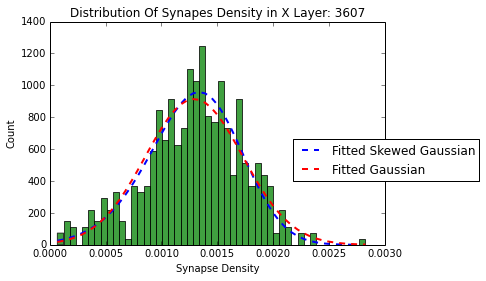

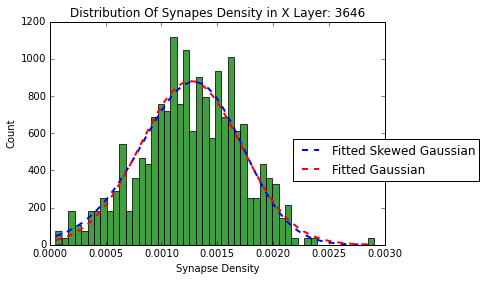

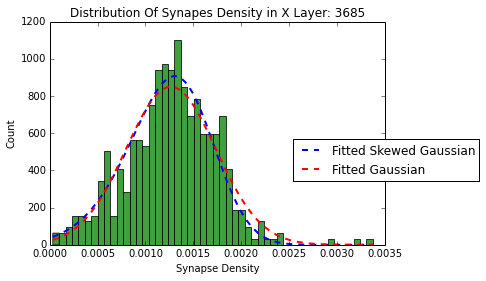

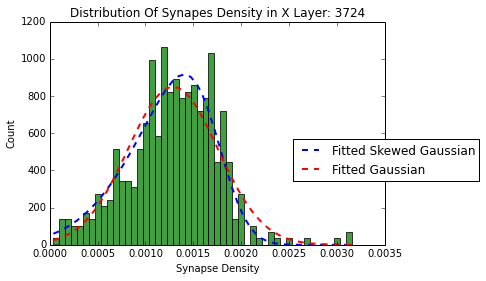

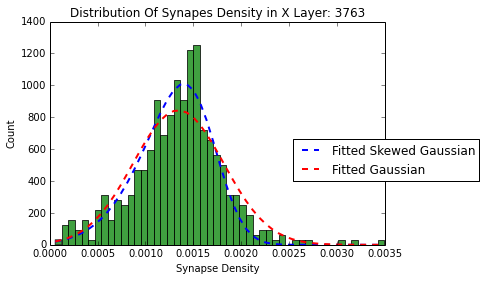

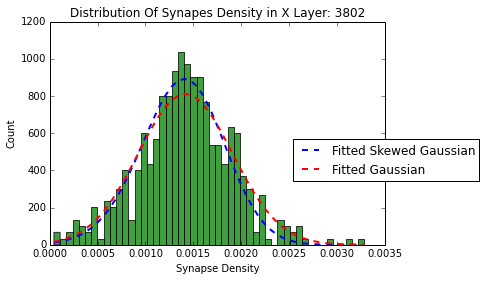

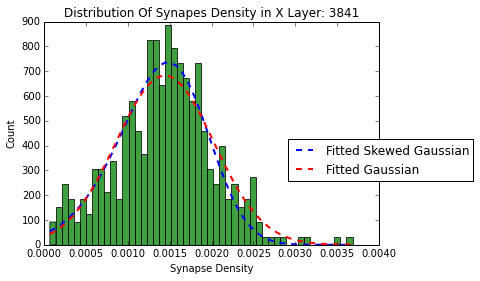

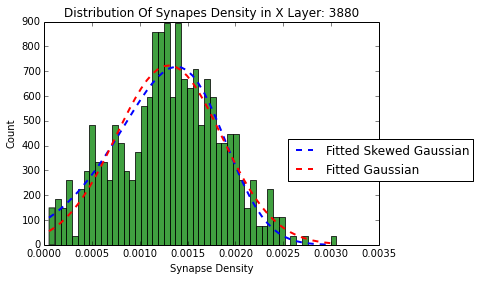

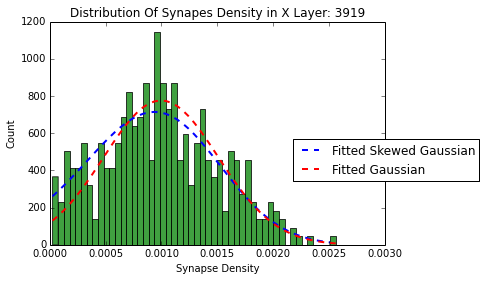

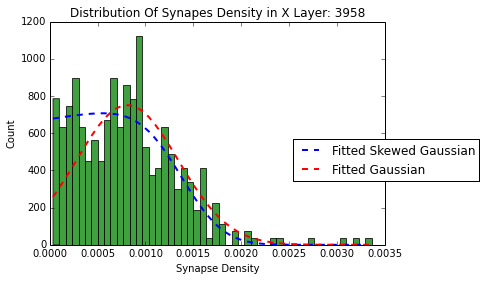

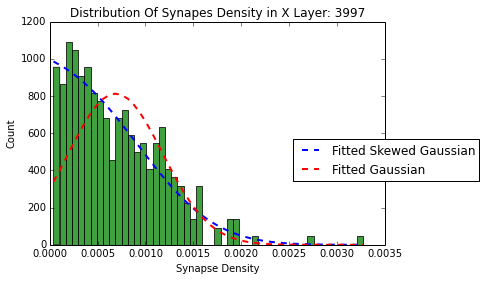

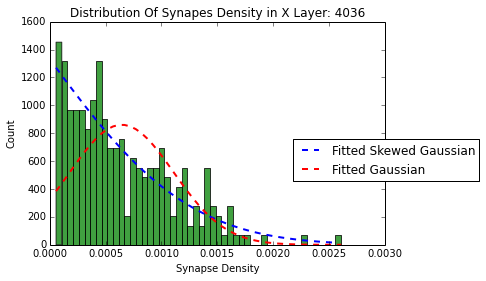

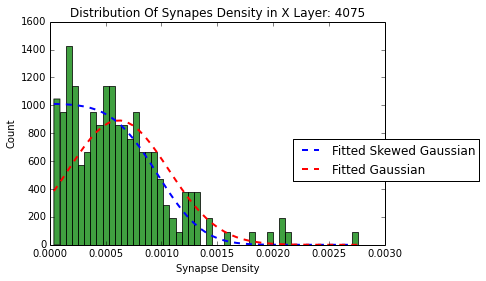

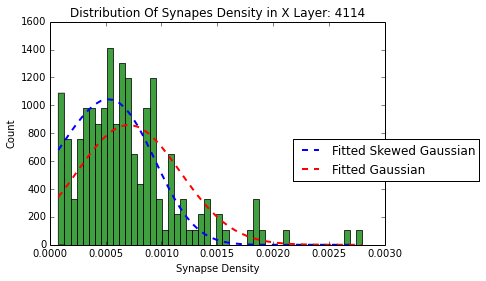

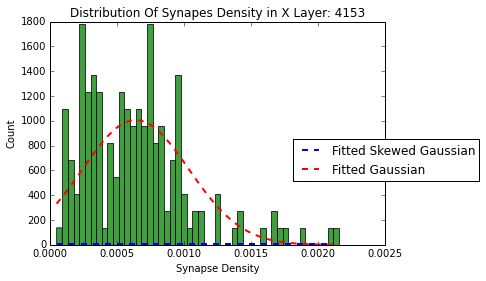

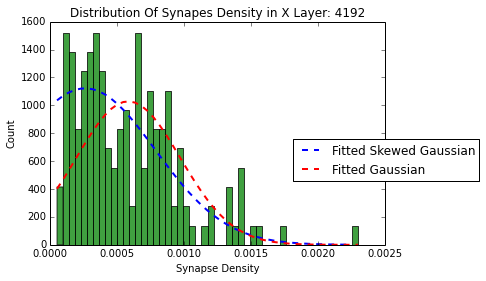

In [12]:
from lmfit.models import SkewedGaussianModel
import pylab
for i in sorted_x:
    s = []
    for r in rows:
        if r[-2] != 0:
            if r[-1] !=0:
                if r[0] == i:
                    s.append(float(r[-1])/float(r[-2]))
                    
    # the histogram of the data
    n, bins, patches = plt.hist(s, 50, normed=1, facecolor='green', alpha=0.75)
    
    model = SkewedGaussianModel()
    params = model.make_params(amplitude=10, center=0, sigma=1, gamma=0)

    # adjust parameters  to best fit data.
    result = model.fit(n, params, x=bins[:50])

    #print(result.fit_report())
    #pylab.plot(xvals, yvals)
    plt.plot(bins[:50], result.best_fit, 'b--', linewidth=2) 
    
    #GAUSSIAN
    # best fit of data normal curve (gaussian)
    (mu, sigma) = norm.fit(s)
    # add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    
    l = plt.plot(bins, y, 'r--', linewidth=2)
    plt.title("Distribution Of Synapes Density in X Layer: "+ str(i))
    plt.xlabel("Synapse Density")
    plt.ylabel("Count")
    plt.legend(['Fitted Skewed Gaussian', 'Fitted Gaussian'], loc='upper right',bbox_to_anchor=(1.3, 0.5))
    #pylab.savefig(str(i)+'.png')
    plt.show()

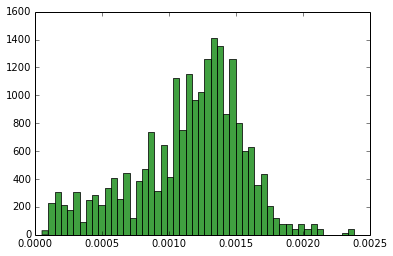

In [10]:
#Test out saving figures
import pylab

for r in rows:
    if r[-2] != 0:
        if r[-1] !=0:
            if r[0] == 2398:
                s.append(float(r[-1])/float(r[-2]))
                    
# the histogram of the data
n, bins, patches = plt.hist(s, 50, normed=1, facecolor='green', alpha=0.75)
#pylab.savefig('2222.png')
plt.show()

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # function evals   = 612
    # data points      = 50
    # variables        = 4
    chi-square         = 765660.092
    reduced chi-square = 16644.785
    Akaike info crit   = 493.993
    Bayesian info crit = 501.641
[[Variables]]
    amplitude:   0.98890015 +/- 0.043478 (4.40%) (init= 10)
    sigma:       0.00068582 +/- 5.25e-05 (7.65%) (init= 1)
    center:      0.00173770 +/- 2.99e-05 (1.72%) (init= 0)
    gamma:      -3.21242338 +/- 0.801845 (24.96%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, center)             =  0.762 
    C(sigma, gamma)              = -0.729 
    C(center, gamma)             = -0.642 
    C(amplitude, sigma)          =  0.475 
    C(amplitude, center)         =  0.313 



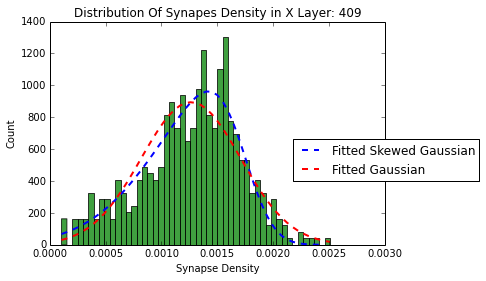

In [15]:

s = []
for r in rows:
    if r[-2] != 0:
        if r[-1] !=0:
            if r[0] == 370:
                s.append(float(r[-1])/float(r[-2]))
                    
# the histogram of the data
n, bins, patches = plt.hist(s, 50, normed=1, facecolor='green', alpha=0.75)
    
model = SkewedGaussianModel()
params = model.make_params(amplitude=10, center=0, sigma=1, gamma=0)

# adjust parameters  to best fit data.
result = model.fit(n, params, x=bins[:50])
print(result.fit_report())
#print(result.fit_report())
#pylab.plot(xvals, yvals)
plt.plot(bins[:50], result.best_fit, 'b--', linewidth=2) 
    
#GAUSSIAN
# best fit of data normal curve (gaussian)
(mu, sigma) = norm.fit(s)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
    
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.title("Distribution Of Synapes Density in X Layer: "+ str(409))
plt.xlabel("Synapse Density")
plt.ylabel("Count")
plt.legend(['Fitted Skewed Gaussian', 'Fitted Gaussian'], loc='upper right',bbox_to_anchor=(1.3, 0.5))
pylab.savefig(str(i)+'.png')
plt.show()